# Step 1 - 6
### Here is a notebook for [the MedExtractionPipeline](./MedExtractionPipeline.ipynb)

# Step 7: Processing Context

The template of this notebook is largely based on the MultiSentenceDocuments.ipynb example notebook by pyContextNLP

In [5]:
pat_l = [1115115, 1473278, 1690864, 1802803, 2454333, 3201918, 3397392, 3400469, 4055127, 4096762, 4377753, 5193504,
5202476, 6039252, 6442237, 6804060, 8246084, 8296193, 9014870, 9450112,
1187348, 2209774, 2787906, 329171, 3291717, 4578579, 5009478, 5081898, 5094776, 5104346, 5465573, 6554361, 6668858, 9201312]

In [6]:
print(pat_l)

[1115115, 1473278, 1690864, 1802803, 2454333, 3201918, 3397392, 3400469, 4055127, 4096762, 4377753, 5193504, 5202476, 6039252, 6442237, 6804060, 8246084, 8296193, 9014870, 9450112, 1187348, 2209774, 2787906, 329171, 3291717, 4578579, 5009478, 5081898, 5094776, 5104346, 5465573, 6554361, 6668858, 9201312]


In [14]:
print(sys.path)

['', 'E:\\modules\\Anaconda\\Program\\python36.zip', 'E:\\modules\\Anaconda\\Program\\DLLs', 'E:\\modules\\Anaconda\\Program\\lib', 'E:\\modules\\Anaconda\\Program', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\savreaderwriter-3.3.0-py3.6.egg', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\pyexcel_gantt-0.0.1-py3.6.egg', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\win32', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\win32\\lib', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\Pythonwin', 'E:\\modules\\Anaconda\\Program\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tdmaarseveen\\.ipython', '../', '../modules', '/modules/', '../', '../modules', '/modules/', '../', '../modules', 'H:/ProjectCopy/Files', '../', '../modules', 'H:/ProjectCopy/Files', 'H:/ProjectCopy/Files/output_files', '../', '../modules', 'H:\\ProjectCopy\\Files']


In [16]:

import sys
sys.path.append('../') 
sys.path.append('../modules') # Append Map with modules to the source tree
sys.path.append('H:\\ProjectCopy\\Files')
sys.path.append('H:\\ProjectCopy\\Files\\output_files')
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import EMR_functions as em
from datetime import datetime, date, timedelta
from acronyms import DMARD

import modules.pyConTextNLP2.pyConTextNLP.pyConText as pyConText

import modules.pyConTextNLP2 #import itemData
#from textblob import TextBlob
import modules.pyConTextNLP2.pyConTextNLP.display.html as html
from IPython.display import display, HTML

def read_csv(f_name):
    return pd.read_csv(f_name, sep="|")

## 7.1 Open relevant datasets 
### 7.1.1 open explore dataset

In [18]:
df_explore = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_explore.csv', index_col=0, sep="|", na_values=['NA'])
print(len(df_explore))

5992


### Create DAS-model dataset

In [8]:
df_gewricht[['CATEGORIE', 'DATUM', 'TIJD', 'MUTDAT', 'MUTTIJD',
       'GEBRUIKER', 'DEFINITIEF', 'COMPLEET', 'OPSLAGID', 'BEANTWID',
       'PARENTSTATUS_D', 'PARENTSTATUS_S', 'GROEP', 'ANTWOORD', 'XANTWOORD',
       'XSCORE', 'XEXT_CODE', 'YANTWOORD', 'YSCORE', 'YEXT_CODE', 'REALVRID',
       'OBJALIAS', 'OBJID', 'STATUS', 'HIERARCHY', 'ITEMID', 'PARENTANTW',
       'CONTROLID', 'NAAM', 'TABEL', 'VELD', 'RETURN_FIELD', 'ANCESTANTW',
       'BEVAT_SIBL', 'DATUM_A', 'TIJD_A', 'OPSLAGID_B', 'COMMENTAAR',
       'KOPPELID', 'AUTEURCD', 'SUPDAT', 'SUPTIJD', 'SUPERVISOR',
       'VRLIJSTTYPEID', 'DOSSIERID', 'PARENTBEANTWID', 'REALSUBID',
       'EENHEIDCD', 'MODEL_ID', 'CONFIG', 'DATA', 'STELLING']].head(500).to_csv(r'DF_BLIND_gewrichtspop.csv', sep='|', index=True)

### 7.1.2 Medicator

In [19]:
df_MV = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_MV.csv', index_col=0, sep="|") 

E:\modules\Anaconda\Program\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,7,8,10,12,16,20,22,25,26,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df_BezDat0 = df_MV.groupby('patient_id')['SchemaStartDatumtijd'].min()
print(len(df_BezDat0))
print(len(df_MV['patient_id'].unique()))

3506
3507


In [ ]:

print(len(df_gewricht['PATNR'].unique()))
print(len(df_gewricht[(df_gewricht['STELLING']=='Pijnlijke gewrichten') | (df_gewricht['STELLING']=='Gezwollen gewrichten')| (df_gewricht['STELLING']=='DAS 44') | (df_gewricht['STELLING']=='DAS 28')]['PATNR'].unique()))

In [ ]:
print('Totaal aantal pat', len(df_explore['PATNR'].unique()))
print('Overlap met Pat uit Exploreset:', len(df_explore[df_explore['PATNR'].isin(df_demo['PATNR'].unique())]['PATNR'].unique()))

### 7.1.3 Open annotated dataset

In [23]:
df_corrected = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_proc_annotated.csv', index_col=0, sep="|", na_values=['NA'])
df_corrected['XANTWOORD'] = df_corrected['XANTWOORD'].apply(lambda x: re.sub(r'\s\.',r'.',x))
pc_df = em.Processing(df_corrected)

pc_df.getDF().head(1)['XANTWOORD']

2    poli - bespreking ^nu bridging prednison ^stop...
Name: XANTWOORD, dtype: object

## 7.2 Prepare pyContext 

### 7.2.1 Initialize list of modifiers & targets

- Targets = other words for entities
- Modifiers = terms that influence the meaning of the sentence (like negation terms)

In [28]:
import sys
sys.path.append('../') 
sys.path.append('../modules') 

import modules.pyConTextNLP2.pyConTextNLP.pyConText as pyConText
import modules.pyConTextNLP2.pyConTextNLP.itemData as itemData
from IPython.display import display, HTML
import EMR_functions as em


cp = em.ContextProcessing('corpus/featureExtractionRegex.yml', 'corpus/targets.yml')

print(cp.getTargets())
# Maybe use different modifiers/ entities for different steps!!

[literal<<methotrexaat>>; category<<['target']>>; re<<\bmethotrexaat\b>>; rule<<>>, literal<<leflunomide>>; category<<['target']>>; re<<\bleflunomide\b>>; rule<<>>, literal<<sulfasalazine>>; category<<['target']>>; re<<\bsulfasalazine\b>>; rule<<>>, literal<<hydroxychloroquine>>; category<<['target']>>; re<<\bhydroxychloroquine\b>>; rule<<>>, literal<<azathioprine>>; category<<['target']>>; re<<\bazathioprine\b>>; rule<<>>, literal<<ciclosporine>>; category<<['target']>>; re<<\bciclosporine\b>>; rule<<>>, literal<<azathioprine>>; category<<['target']>>; re<<\bazathioprine\b>>; rule<<>>, literal<<goud>>; category<<['target']>>; re<<\bgoud\b>>; rule<<>>, literal<<abatacept>>; category<<['target']>>; re<<\babatacept\b>>; rule<<>>, literal<<adalimumab>>; category<<['target']>>; re<<\badalimumab\b>>; rule<<>>, literal<<anakinra>>; category<<['target']>>; re<<\banakinra\b>>; rule<<>>, literal<<certolizumab>>; category<<['target']>>; re<<\bcertolizumab\b>>; rule<<>>, literal<<etanercept>>; ca

### 7.2.2 Install punkt (if not done before)

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tdmaarseveen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### 7.2.3 Unit testing 

Assigning a unique color to every label

In [35]:
clrs = {\
    "route": "green",
    "duration" : "yellow",
    "target": "blue",
    "definite_negated_existence": "red",
    "continue": "indianred",
    "hypothetical": "orange",
    "probable_negated_existence": "forestgreen",
    "definite_existence": "lime",
    "historic": "goldenrod",
    "frequency": "pink",
    "concentration": "green",
    "change": "violet",
    "form": "silver",
    "dosage" : "brick"
}
units = ['ds opties mtx  23 mg en prednison 15 mg afbouwen?', 'hervatten mtx ; 15 mg', 'hydroxychloroquine ophogen naar 2 dd prednison d', 'eerst methotrexaat naar 4 tabletten ', ' start sulfasalazine in opbouw dosering tot 2 dd 1000 mg ', '1 x per week 2 gram mtx', 'per week 12,5 milligram methotrexaat, nu 24 g prednison', '1 x per 8 weken mtx os', ' 2 x per dag 75 milligram mtx', '12 x dd 15 mg mtx','2 maal a 3 weken adalimumab nu 4 tabl. adalimumab 2 ', '6 tabletten per week mtx', 'mtx voor 1 maand 1 dd 20 mg', 'iom patient probeer adalimumab naar 1 x 3 wkn', '1 dd 2 mtx', ' 1 x week mtx', 'plan : depomedrol 80 mg i.v ^check oogarts hydroxychloroquine ; volgens patient 2012 geweest', 'prednison naar 7.5 mg 1 dd 1 ', 'med : methotrexaat 15 mg ', 'verhogen van 20 tot 3.5 g per wk mtx.', 'mtx nr 2 d 100 mg ', 'methotrexaat naar 10 mg.',
        'mtx om de dag 24 mg. prednison elke week', ' verlaag mtx naar 1 x 15 mg' , '1 x elke week mtx', '7.5 mg per wk mtx',  'mtx hervatten lagere dosis : 7.5 mg / wk per os ', 'mtx 25 mg s.c. ', 'prednison minderen naar 2.5 mg 1 dd ', 'rituximab na 2.5 mg 1 dd ', 'nog 2 maal a 3 weken adalimumab ',
         'van 20 mg naar 3.5 mg mtx', 'mtx verhoogd naar 15 mg ', '4 spuiten 15 ml per week van mtx', 'mtx verhogen naar 1 x per week', 'mtx 3 - 2 weken', 'mtx verlagen naar 0', 'mtx verlagen naar 1 x per week', ' 1 maand 10 mg / d mtx', 'mtx vanaf begin feb. naar 20 mg / wk']

### Testing units

In [36]:
for x in units[:5]: # [22:24]
    x = x.replace("mtx", "methotrexaat")
    #print(x)
    context = cp.readContext(x)
    #print(context)
    display(HTML(html.mark_document_with_html(context ,colors = clrs, default_color="black")))

In [10]:
import re
l_ent = cp.extractFeatures('tzc gestaakt ^opstarten infliximab 5 mg / kg gewicht = 400 mg per gift w 0,2.6 , daarna elke 6 wk ^prednison ophogen naar 7,5 mg ^hcq stoppen ^mtx verlagen naar 20 mg / d , fz ophogen naar 2 tabl / week ^ssz door ^tc over 1 mnd , lab elke maand , controle over 3 mnd ^op verzoek van pt icc fysiotherapeut en ergotherapeut ^ ^pm hep b dna volgen ')
print(l_ent)

[['infliximab', '5', 'mg', None, 'w', None, '6', 'wk', None, None, None, False, False, False, False, 0.29250000000000004, 'infliximab w 5 mg 6 wk '], ['prednison', '7', 'mg', None, None, None, None, None, None, None, 'Ophogen', False, False, True, False, 0.15000000000000002, 'Ophogen prednison 7 mg ']]


In [ ]:
context = readContext('methotrexaat vervolgen nr 20 mg depomedrol doorzetten 80 mg im')
#methotrexaat nr 20 mg depomedrol 80 mg im
display(HTML(html.mark_document_with_html(context ,colors = clrs, default_color="black")))

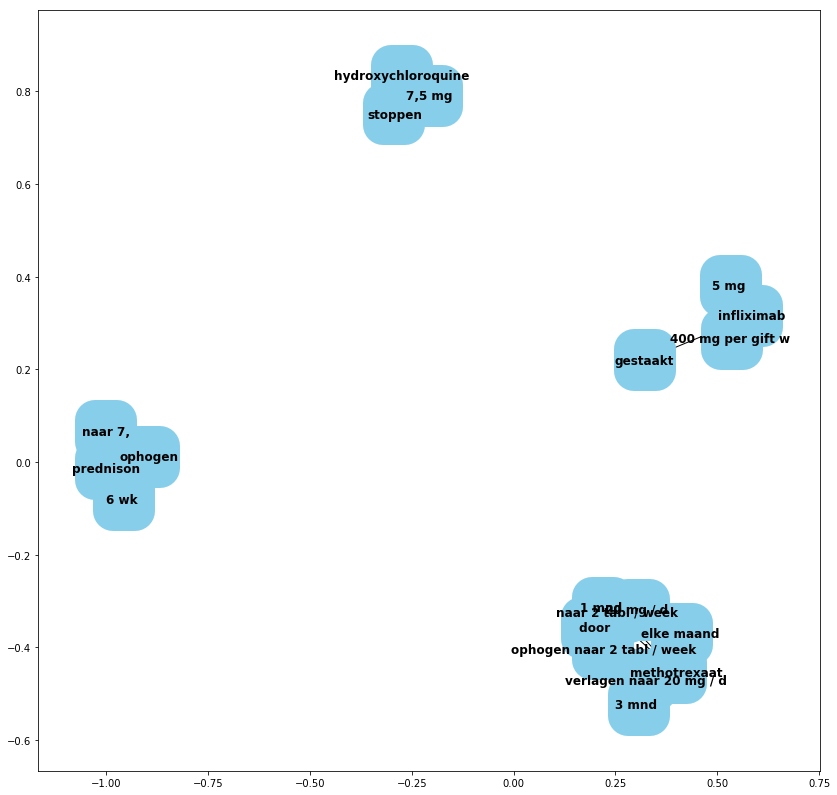

In [11]:
import matplotlib.pyplot as plt

sent = 'tzc gestaakt ^opstarten infliximab 5 mg / kg gewicht = 400 mg per gift w 0,2.6 , daarna elke 6 wk ^prednison ophogen naar 7,5 mg ^hydroxychloroquine stoppen ^methotrexaat verlagen naar 20 mg / d , fz ophogen naar 2 tabl / week ^ssz door ^tc over 1 mnd , lab elke maand , controle over 3 mnd ^op verzoek van pt icc fysiotherapeut en ergotherapeut ^ ^pm hep b dna volgen '
plt = cp.createSimpleNetwork(sent)

plt.draw()
plt.savefig('NetworkFeatures.png')

# Build the Pipeline

## Write to new dataframe

### 1. First time? -> Process TypoVal file

In [ ]:
df_auto = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_typoValidation.csv', index_col=0, sep="|", na_values=['NA'])[['ID', 'PATNR', 'XANTWOORD', 'DATUM']]

# Correct DF_auto
pc_df = em.Processing(df_auto)
pc_df.getDictCutOff()
df_auto, l_typo_found = pc_df.typoProcessing('XANTWOORD')
#df_auto = df_auto.sample(frac=0.5, replace=True, random_state=777)
df_auto.to_csv(r'output_files/DF_TypoVal_proc.csv', sep='|', index=True)

### 2. Not first time: Read processed TypoVal file

In [38]:
import pandas as pd
df_auto = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_TypoVal_proc.csv', index_col=0, sep="|", na_values=['NA'])
df_auto.head()

,ID,PATNR,XANTWOORD,DATUM
9,96749776,9168006,"switch methotrexaat p.o. - > s . c . , prikins...",2011-06-23 00:00:00+00:00
12,97208072,6727644,"voorlopig via huisarts , indien contact nodig ...",2012-07-16 00:00:00+00:00
14,97284504,4980946,"stop methotrexaat , start leflunomide 20 mg 1 ...",2012-10-02 00:00:00+00:00
17,97184517,9018032,verlaag methotrexaat naar 10 mg per os . ^cont...,2012-07-10 00:00:00+00:00
33,96926774,9175658,wel geadviseerd naar de benenpoli te gaan maar...,2011-12-23 00:00:00+00:00


In [40]:
print(pat_l)

[1115115, 1473278, 1690864, 1802803, 2454333, 3201918, 3397392, 3400469, 4055127, 4096762, 4377753, 5193504, 5202476, 6039252, 6442237, 6804060, 8246084, 8296193, 9014870, 9450112, 1187348, 2209774, 2787906, 329171, 3291717, 4578579, 5009478, 5081898, 5094776, 5104346, 5465573, 6554361, 6668858, 9201312]


In [39]:
df_auto[df_auto['PATNR'].isin(pat_l)]

,ID,PATNR,XANTWOORD,DATUM


In [2]:
df_annotated_man = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\GoudenStandaard_FeatureExtraction2.csv', index_col=2, header=29, sep="|", na_values=['NA'])
df_annotated_man = df_annotated_man.dropna(thresh=5)
df_annotated_man

#print(len(a8))

#print(len(np.intersect1d(a7, a8)))

,groepsnaam gebruikt,groepnaam gebruikt voor voorschrift,PATNR,DATUM,XANTWOORD,Unnamed: 6,Unnamed: 7,voorschrift,actie (change status),drug,freqeuncy,sterkte,form,route,dosering,duur,datum,opmerking,Unnamed: 19
147.0,#REF!,NaN,1082790.0,2013-11-06 00:00:00+00:00,ad 1 . ihkv improved : stop leflunomide . nog ...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165.0,#REF!,NaN,9222396.0,2015-04-01 00:00:00+00:00,- arcoxia stop - gastroscopie staat gepland 2...,start abatacept,NaN,1,start,abatacept,NaN,NaN,NaN,NaN,NaN,NaN,direct,dosering onduidelijk,start abatacept
165.0,#REF!,NaN,9222396.0,2015-04-01 00:00:00+00:00,- arcoxia stop - gastroscopie staat gepland 2...,start depomedrol 80mg i.m.,NaN,1,start,depomedrol,NaN,80mg,NaN,i.m.,NaN,eenmalig,direct,NaN,start depomedrol 80 mg i.m. eenmalig
493.0,#REF!,NaN,9388501.0,2011-06-17 00:00:00+00:00,"mtx spuiten opmaken , daarna mtx staken x h / ...",geen verandering,NaN,2,doorgaan,methotrexaat,NaN,NaN,NaN,NaN,NaN,totdat spuiten op zijn,direct,NaN,doorgaan methotrexaat
861.0,#REF!,NaN,989157.0,2011-12-20 00:00:00+00:00,ena uitsplitsen ( ro / la ? ) tiger ? patiente...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995.0,#REF!,NaN,8413118.0,2012-12-05 00:00:00+00:00,"l . heimans , improved v 14 : humira staop , a...",geen verandering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007.0,#REF!,FALSE,1099880.0,2012-06-04 00:00:00+00:00,policontrole staat gepland op 7 / 6 plan : was...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025.0,#REF!,NaN,8094276.0,2012-05-31 00:00:00+00:00,iom v gaalen : terug naar uiteindelijke werken...,"methotrexaat 7,5mg/week",NaN,1,NaN,methotrexaat,1x/week,"7,5mg",NaN,NaN,NaN,NaN,direct,NaN,"methotrexaat 7,5mg 1x/week"
1025.0,#REF!,NaN,8094276.0,2012-05-31 00:00:00+00:00,iom v gaalen : terug naar uiteindelijke werken...,start adalimumab,NaN,1,start,adalimumab,NaN,NaN,NaN,NaN,NaN,NaN,na screening,screening volgt nog,start adalimumab na screening
1048.0,#REF!,FALSE,1531035.0,2012-10-29 00:00:00+00:00,heeft op 15 oktober nog bloed laten prikken . ...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Extraction Evaluation
###  Split into train & test
1. Select random sample of indices for trainingsset
2. Create subselection according to list of indices

In [3]:
import random

idx = df_annotated_man.index.intersection(df_auto.index).unique()
#print(len(idx))
random.seed(123)
sub_selection = random.sample(list(idx), round(len(df_annotated_man.index.unique())*0.5))
not_included = [x for x in list(idx) if x not in sub_selection]

#print(len(df_annotated_man.index.unique())*0.5)
df_auto_train = df_auto.ix[sub_selection] #set for 
df_train = df_annotated_man.ix[sub_selection] # Man Annotation


# testset

df_test = df_auto.ix[not_included]
#df_test = df_test.drop([0,1,2], axis=0)
df_test.head()
#print(len(df_test))

NameError: name 'df_auto' is not defined

### [Feature Extraction Evaluation] Annotate Sample data for Manual review -> for training

In [ ]:

def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

new_df= pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 
                              'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 
                              'route', 'dosering', 'duur', 'Conclusie'])
teller = 0
proc = em.Processing(df_test)
for index, row in df_test.iterrows():
    l_entry = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']
    for entry in l_entry: 
        new_df = new_df.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16]}, ignore_index=True)
        teller += 1
        
print(teller)
new_df = new_df.replace('None{2}', '', regex=True)
new_df = new_df.replace('None', '', regex=True)
new_df.tail()



### Feature Extraction - Visualize Most frequently prescribed

In [20]:
df = pd.read_csv(r'output_files/DF_annotated_FeatureExtraction_NEW.csv', sep='|', index_col=0)
print(len(df))
print(df['actie'].value_counts().idxmax(), df['actie'].value_counts().max())
print(df['drug'].value_counts().idxmax(), df['drug'].value_counts().max())
print(df['strength_nr'].value_counts().idxmax(), df['strength_nr'].value_counts().max())
print(df['strength_unit'].value_counts().idxmax(), df['strength_unit'].value_counts().max())
print(df['freq_nr'].value_counts().idxmax(), df['freq_nr'].value_counts().max())
# Most occuring freq_unit -> also count wk + w along side week
print(df['freq_unit'].value_counts().idxmax(), df['freq_unit'].value_counts().max()
      + df['freq_unit'].value_counts()[2] + df['freq_unit'].value_counts()[8]) # remove this if new data!


561
start 45
methotrexaat 140
10 18
mg 130
1.0 18
week 40


### Simple Postprocessing of dataframe
1. Exclude entries from certain studies (best & improved -v)
2. Write dataframe to csv file

In [ ]:
cleansed_df = new_df.copy()
exclude_list = ['improved\s?\^?\s?v', 'best\s\:'] # exclude studies + best study ->> TODO Improved verbetern
regexp = re.compile(r'|'.join(exclude_list))
for index, row in cleansed_df.iterrows():
    if regexp.search(row['XANTWOORD']):
        cleansed_df.ix[index, 'Hypothetical'] = True
        cleansed_df.ix[index, 'Conclusie'] = 'geen voorschrift' 
        #print(index, 'yes')
cleansed_df.to_csv(r'output_files/DF_annotated_FeatureExtraction_NEW.csv', sep='|', index=True)

### [LONGITUDINAL EVALUATION]

Uiteindelijk meer patienten

In [12]:
df_reubel = pd.read_csv(r'H:\\ProjectCopy\\Files\\output_files\\DF_REUBEL.csv', index_col=0, sep="|")
#df_reubel[df_reubel['PATNR'] == 2209774][['PATNR', 'DATUM', 'XANTWOORD']]

# Correct DF_auto
pc_df = em.Processing(df_reubel)
pc_df.generateTypoCuttOffPlot(pc_df.getDF())
pc_df.getDictCutOff()
df_reubel, l_typo_found = pc_df.typoProcessing('XANTWOORD')
#df_auto = df_auto.sample(frac=0.5, replace=True, random_state=777)
df_reubel.to_csv(r'featureExtraction/DF_REUBEL_proc.csv', sep='|', index=False)

[48, 4, 1, 1, 7, 72]
[137, 7, 1, 0.0, 5, 660]
[28, 3, 0.0, 0.0, 0.0, 19]
[5, 3, 0.0, 0.0, 0.0, 0.0]
[9, 0.0, 0.0, 0.0, 0.0, 87]
[6, 0.0, 0.0, 0.0, 16, 55]
[79, 11, 2, 10, 7324, 27815]
[26, 5, 44, 8, 67, 804]
[0.0, 1, 0.0, 254, 26186, 121850]
[8, 12, 3, 2, 77, 94]
[25, 2, 6, 14, 1138, 13491]
[18, 12, 6, 60, 339, 29170]
[15, 0.0, 0.0, 6, 109, 1364]
[12, 0.0, 1, 42, 519, 6090]
[47, 35, 27, 7, 52, 79]
[0.0, 0.0, 2, 0.0, 14, 137]
[5, 1, 0.0, 0.0, 14, 3777]
[255, 15, 11, 118, 27, 2314]
[846, 44, 155, 78, 2918, 27334]
[143, 27, 847, 38, 440, 383]
tocilizumab Calculated amount of Typos: 107
abatacept Calculated amount of Typos: 98
depomedrol Calculated amount of Typos: 312
leflunomide Calculated amount of Typos: 152
prednisolon Calculated amount of Typos: 157
certolizumab Calculated amount of Typos: 29
prednison Calculated amount of Typos: 874
hydroxychloroquine Calculated amount of Typos: 48
adalimumab Calculated amount of Typos: 46
infliximab Calculated amount of Typos: 20
methotrexaat Calcu

In [41]:
#pc_df.getDictCutOff()
df_reubel = pd.read_csv(r'H:\\ProjectCopy\\Files\\featureExtraction\\DF_REUBEL_proc.csv', index_col=0, sep="|")
df_reubel.head()[['XANTWOORD', 'PATNR']]

,XANTWOORD,PATNR
LIJSTID,,
CS00000503,hydroxychloroquine 2 x 200 : prednison 1 x 7.5...,9655006
CS00000503,methotrexaat verlagen naar 15 mg per week . fo...,7043920
CS00000503,x ter inschatting schade,4071686
CS00000503,opnieuw icc mdl ^echo abdomen ; lab ^co 3 mnd ...,8456194
CS00000503,mail naar j vlot ivm bezwaar bloedafnames bij ...,8975833


In [54]:
#pat_selection = df_reubel[df_reubel['PATNR'].isin(pat_l)]['PATNR'].unique()
#print(list(set(pat_l) - set(df_reubel[df_reubel['PATNR'].isin(pat_l)]['PATNR'].unique())))
df_sub = df_reubel[df_reubel['PATNR'].isin(pat_selection)]
df_sub.head()

,CATEGORIE,DATUM,TIJD,MUTDAT,MUTTIJD,GEBRUIKER,DEFINITIEF,COMPLEET,PATNR,OPSLAGID,...,VRLIJSTTYPEID,DOSSIERID,PARENTBEANTWID,REALSUBID,EENHEIDCD,MODEL_ID,CONFIG,DATA,STELLING,DUURTOT
LIJSTID,,,,,,,,,,,,,,,,,,,,,
CS00000503,REU,2012-07-02 00:00:00+00:00,14:27,2012-07-03 00:00:00,17:33,16474,False,False,5081898,1088499648,...,OA,REU5081898,NaN,NaN,NaN,NaN,NaN,NaN,Beleid,1408
CS00000503,REU,2015-08-11 00:00:00+00:00,00:34,2015-08-11 00:00:00,15:00,11085,False,False,6804060,1455166930,...,PVC,1000412619,NaN,NaN,NaN,NaN,NaN,NaN,Beleid,1564
CS00000503,REU,2018-01-12 00:00:00+00:00,11:20,2018-01-26 00:00:00,14:16,46241,False,False,1473278,1893738679,...,PVC,1000682887,NaN,NaN,NaN,NaN,NaN,NaN,Beleid,884
CS00000503,REU,2012-02-22 00:00:00+00:00,15:01,2012-02-22 00:00:00,16:24,26637,False,False,9450112,1058557895,...,KB,1000168925,NaN,NaN,NaN,NaN,NaN,NaN,Beleid,2225
CS00000503,REU,2012-02-23 00:00:00+00:00,10:20,2012-02-23 00:00:00,16:16,06800,False,False,9450112,1058656566,...,TC,1000168925,NaN,NaN,NaN,NaN,NaN,NaN,Beleid,2225


In [2]:
df_reuOverlap = pd.read_csv(r'featureExtraction/DF_OVERLAP_METEOR_HIX.csv', index_col=0, sep="|")
df_reubel = pd.read_csv(r'featureExtraction/DF_REUBEL_proc.csv', index_col=0, sep="|")
print(len(df_reubel['PATNR'].unique()))
print(len(df_reubel[df_reubel['PATNR'].isin(df_reuOverlap['PATNR'].unique())]['PATNR'].unique()))
df_reubel = df_reubel[df_reubel['PATNR'].isin(df_reuOverlap['PATNR'].unique())]
df_cand = df_reubel 
df_cand.sort_values(['PATNR', 'DATUM'])
len(df_cand)

NameError: name 'pd' is not defined

In [ ]:
## training on the test set

In [6]:
import random

df_reuOverlap = pd.read_csv(r'featureExtraction/DF_OVERLAP_METEOR_HIX.csv', index_col=0, sep="|")

df_test = pd.read_csv(r'output_files/DF_test.csv', index_col=0, sep="|")
df_test = df_test[df_test['PATNR'].isin(df_reuOverlap['PATNR'].unique())]

random.seed(400)
pat_selection = random.sample(list(df_test['PATNR'].unique()), round(len(list(df_test['PATNR'].unique()))*0.1))

df_cand = df_test[df_test['PATNR'].isin(pat_selection)]
df_cand.sort_values(['PATNR', 'DATUM'])
len(df_cand)


511

In [ ]:
import random
# Get all of the entries not used in the test set
df_patSamp = df_auto[~df_auto['PATNR'].isin(df_annotated_man['PATNR'].unique())]

random.seed(400)
pat_selection = random.sample(list(df_patSamp['PATNR'].unique()), 10)

# create sample with 10 candidate patients
df_cand = df_patSamp[df_patSamp['PATNR'].isin(pat_selection)]
len(df_cand)

In [56]:
###### Get first date from DDRA

df_firstDDRA = pd.read_csv(r'H:\\ProjectCopy\\Files\\featureExtraction\\DF_firstDateFreeText.csv', sep='|', index_col=0, names=['PATNR', 'firstDate'], header=None)
#print(df_firstDDRA.head())
print(df_firstDDRA.loc[4907]['firstDate'])

2011-08-10 00:00:00+00:00


In [57]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))
## df_cand = df_sub
new_df_cand= pd.DataFrame(columns=['index', 'PATNR', 'DATUM', ])
teller = 0
proc = em.Processing(df_cand)
for index, row in df_cand.iterrows():
    l_entry = cp.extractFeatures(row['XANTWOORD'].lower())
    firstDat = df_firstDDRA.loc[row['PATNR']]['firstDate']
    
    for entry in l_entry: 
        if (len(l_entry) == 1 or (entry[15] >= 0.15 and entry[12] != True)):
            new_df_cand = new_df_cand.append({'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                    'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                    'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                    'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                    'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16], 'Bezdat0': firstDat, 'dosering': str(entry[8])+ ' ' + str(entry[1])+ ' ' + str(entry[2])  }, ignore_index=True)

            teller += 1
        
print(teller)
new_df_cand = new_df_cand.replace('None{2}', '', regex=True)
new_df_cand = new_df_cand.replace('None', '', regex=True)
new_df_cand.tail()


524


,index,PATNR,DATUM,Bezdat0,Change,Conclusie,Confidence,Continue,Hypothetical,Negation,...,actie,dosering,drug,duur,form,freq_nr,freq_unit,route,strength_nr,strength_unit
519,CS00000503,1473278,2017-11-13 00:00:00+00:00,2015-09-29 00:00:00+00:00,False,methotrexaat wk 20 mg,0.2925,False,False,False,...,None,20 mg,methotrexaat,,inj,,wk,None,20,mg
520,CS00000503,1473278,2017-11-13 00:00:00+00:00,2015-09-29 00:00:00+00:00,False,prednison week 5 mg,0.2250,False,False,False,...,None,5 mg,prednison,,None,,week,None,5,mg
521,CS00000503,1473278,2017-11-13 00:00:00+00:00,2015-09-29 00:00:00+00:00,False,sulfasalazine d 2 g,0.2250,False,False,False,...,None,2 g,sulfasalazine,,None,,d,None,2,g
522,CS00000503,6039252,2017-11-30 00:00:00+00:00,2016-10-12 00:00:00+00:00,None,geen medicatie,NaN,None,None,None,...,None,,None,,None,,,None,,
523,CS00000503,1473278,2018-01-18 00:00:00+00:00,2015-09-29 00:00:00+00:00,True,Switch anakinra,0.1500,False,False,False,...,Switch,,anakinra,,None,,,None,,


In [21]:
#new_df_cand['Bezdat0']

In [96]:
cleansed_df_cand = new_df_cand.copy()
exclude_list = ['improved\s?\^?\s?v', 'best\s\:'] # exclude studies + best study ->> TODO Improved verbetern
regexp = re.compile(r'|'.join(exclude_list))
for index, row in cleansed_df_cand.iterrows():
    if regexp.search(row['XANTWOORD']): 
        cleansed_df_cand.ix[index, 'Hypothetical'] = True
        cleansed_df_cand.ix[index, 'Conclusie'] = 'geen voorschrift' 
    if cleansed_df_cand.ix[index, 'Conclusie'] == 'geen voorschrift':
        cleansed_df_cand.ix[index, 'drug'] = None
        cleansed_df_cand.ix[index, 'actie'] = None
        cleansed_df_cand.ix[index, 'dosering'] = None
    

    # 
#cleansed_df_cand[['PATNR', 'DATUM', 'Bezdat0', 'drug', 'actie']].head(10)
#print(index, 'yes')
#cleansed_df_cand.sort_values(['PATNR', 'DATUM']).to_csv(r'output_files/DF_LONG_candidates.csv', sep='|', index=True)
#cleansed_df_cand['PATNR', 'DATUM', 'Bezdat0', 'drug', 'actie']

E:\modules\Anaconda\Program\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
E:\modules\Anaconda\Program\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
E:\modules\Anaconda\Program\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
E:\modules\Anaconda\Pr

#### Improving Filteringen
cleansed_df_cand filtering -> later pas filteren. 

In [11]:
df_MV = pd.read_csv(r'output_files/DF_MV.csv', index_col=0, sep="|", na_values=['NA']) # dubbelop?

G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,7,8,10,12,16,20,22,25,26,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
print(len(cleansed_df_cand['PATNR']))

524


In [66]:
from acronyms import ACRONYM_MAP, MEDICINE
import time
#new_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR')
l_excludeEarlyPat = []

df_firstDDRA = pd.read_csv(r'featureExtraction/DF_firstDateFreeText.csv', sep='|', index_col=0, names=['PATNR', 'firstDate'], header=None)
#print(df_firstDDRA.head())
l_excludeEarlyPat.extend(list(df_firstDDRA[(pd.to_datetime(df_firstDDRA['firstDate'])<(pd.to_datetime('2011-04-29')+timedelta(days=180)))].index.unique()))
print('Number of Excluded entries: ', len(cleansed_df_cand[(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]))

print('Prefilter: ', len(cleansed_df_cand['PATNR'].unique()))
cleansed_df_cand = cleansed_df_cand.drop_duplicates(subset=['PATNR', 'DATUM', 'drug', 'actie'])
cleansed_df_cand = cleansed_df_cand[~(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]
print('Afterfilter: ', len(cleansed_df_cand['PATNR'].unique()))

df_subMV = df_MV[df_MV['patient_id'].isin(cleansed_df_cand['PATNR'].unique())]
print(len(df_subMV))

df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']] = df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']].replace(np.nan, '')
df_subMV = df_subMV[df_subMV['MedicatieGPKOmschrijving'].str.contains('|'.join(MEDICINE), case=False)]

exclude_patients = list(df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) <= pd.to_datetime('2011-04-29')+timedelta(days=180)]['patient_id'].unique())

l_excludeEarlyPat.extend(list(df_subMV[df_subMV['patient_id'].isin(exclude_patients)]['patient_id'].unique()))

df_subMV = df_subMV[~(df_subMV['patient_id'].isin(list(l_excludeEarlyPat)))]
cleansed_df_cand = cleansed_df_cand[~(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]
print('After filter MV:', len(cleansed_df_cand['PATNR'].unique()))
###  cleansed_df_cand = cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])>(pd.to_datetime('2011-04-29')+timedelta(days=180)))]
#cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])<(pd.to_datetime('2011-04-29')+timedelta(days=180)))]



Number of Excluded entries:  0
Prefilter:  435
Afterfilter:  435
26961


G:\newAnacondaG\modules\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


After filter MV: 435


In [59]:
cleansed_df_cand[pd.to_datetime(cleansed_df_cand['DATUM'])<=pd.to_datetime('2011-04-29')][['PATNR', 'DATUM']]

,PATNR,DATUM


In [65]:
from acronyms import MEDICINE
from acronyms import ACRONYM_MAP

df_subMV = df_MV[df_MV['patient_id'].isin(cleansed_df_cand['PATNR'].unique())]
#df_subMV = df_subMV.loc[df_subMV['SchemaStartDatumtijd'].between(row['DATUM']- \
#                            timedelta(scope),row['DATUM']+timedelta(scope))]
print(len(df_subMV))
#l_entryY = .apply(extractFeatures(Y_entry_txt))

df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']] = df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']].replace(np.nan, '')
df_subMV = df_subMV[df_subMV['MedicatieGPKOmschrijving'].str.contains('|'.join(MEDICINE), case=False)]
exclude_patients = list(df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) <= pd.to_datetime('2011-04-29')+timedelta(days=180)]['patient_id'].unique())

print(len(df_subMV['patient_id'].unique()))
print(len(df_subMV[df_subMV['patient_id'].isin(exclude_patients)]['patient_id'].unique()))
#df_subMV = df_subMV.iloc#df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) >= pd.to_datetime('2011-04-29')+timedelta(days=180)]

df_subMV.sort_values(['patient_id', 'SchemaStartDatumtijd'])[['patient_id', 'ToedieningsOmschrijving', 'MedicatieGPKOmschrijving', 'SchemaOmschrijving', 'SchemaStartDatumtijd']].head(5)

3556
33
13


E:\modules\Anaconda\Program\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,patient_id,ToedieningsOmschrijving,MedicatieGPKOmschrijving,SchemaOmschrijving,SchemaStartDatumtijd
9536,1115115.0,ORAAL,METHOTREXAAT,1 x per week 15 milligram,2011-08-24 00:00:00
54763,1115115.0,ORAAL,METHOTREXAAT,1 x per week 10 milligram,2012-01-18 00:00:00
57261,1115115.0,ORAAL,METHOTREXAAT,1 x per week 10 milligram,2012-01-18 00:00:00
58917,1115115.0,ORAAL,METHOTREXAAT,1 x per week 10 milligram,2012-01-18 00:00:00
58918,1115115.0,ORAAL,METHOTREXAAT,1 x per week 10 milligram,2012-01-18 00:00:00


In [97]:


class PostProcessingTable(object):
    def __init__(self, df_MV, df_EMR):
        self.df_EMR = df_EMR.copy()
        self.df_MV = df_MV.copy()
        #self.df_MV['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(self.df_MV['SchemaStartDatumtijd'])).tz_localize('UTC')
        #self.df_EMR['DATUM'] = pd.DatetimeIndex(pd.to_datetime(self.df_EMR['DATUM'])).tz_localize('UTC')
        self.df_EMR = self.df_EMR.reset_index()
        self.new_df = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur', 'Conclusie'])
        
        
    def nearest(self, items, pivot):
        """
        Get item from list, closest to the pivot
        """
        return min(items, key=lambda x: abs(x - pivot))
    
    def getDF(self):
        return self.new_df
    
    def merge(self, ix, row, l_rows_del):
        # actie = start bij MV
        row_txt = self.handleStickyChars(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieGPKOmschrijving'].lower())
        
        l_features = cp.extractFeatures(row_txt)
        #print(l_features.replace(np.nan, ''))
        entry = l_features[0]
        firstDat = self.df_MV[self.df_MV['patient_id']==row['patient_id']]['SchemaStartDatumtijd'].min()
        self.new_df = self.new_df.append({'index' : ix, 'ID' : str(len(self.new_df)), 'DATUM' :  row['SchemaStartDatumtijd'], 'PATNR' : row['patient_id'], 'XANTWOORD' : row_txt, 'drug' : entry[0], 
                                    'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                    'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                    'form': entry[9], 'actie': 'Start|Continue', 'Continue': entry[11], 'Hypothetical': entry[12], 
                                    'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16], 'Bezdat0': firstDat, 'dosering': str(entry[8])+ ' ' + str(entry[1])+ ' ' + str(entry[2])  }, ignore_index=True)
        #print(l_features[0])
        #print(l_features[0][0])
        return
    
    def handleStickyChars(self, text):
        """
        At first this function surrounds all sticky characters with spaces.
        This is ultimately to prevent the algorithm from misinterpreting
        text (like medication or negation): mtx.depo -> mtx . depo 
        
        After the splitting on sticky characters the algorithm will 
        assemble the special cases where a sticky character is allowed! 
        
        Dots and commas between integers will be put together: 
            7 , 5 mg -> 7,5 mg (pattern 3 -> aka pat3)
            
        Medication with special/sticky characters in them will be assembled
            as well:
            (1) cortico ' s -> cortico's (yes)
            (2) methotrexaat ' -> methotrexaat ' (no)
            (3) anti - tnf -> anti-tnf (yes) (pat2)
            (4) mtx - sasp -> mtx - sasp (no)
            
        Only medications that stick to a hyphen will be seperated with spaces: 
            mtx-infliximab -> mtx - infliximab 
        
        The function also appends an whitespace to digits: 5mtx -> 5 mtx. 
        Except when there is an acronym like anti-il1 which consists of 
        an integer! (pattern 1 -> aka pat1)
        
        Acronyms like o.s and i.v. are preserved in this function aswell.
        (pattern 4)
            
        Finally, this function removes all of the duplicate whitespace. 
        """
        sticky_chars = r'([!#?,.:";@\-\+\\/&=$\]\[<>\'\*`â€™\(\)])'
        words = text.split() 
        new_words = []
        for word in words:
            new_words.append(re.sub(sticky_chars, r' \1 ', word))
        new_text = ""
        for word in new_words:
            pat1 = re.compile(r'([a-z]{1,})(\d{1,})')
            for r1, r2 in pat1.findall(word):
                if r1+r2 not in MEDICINE and r1+r2 not in ACRONYM_MAP.keys():
                    word = re.sub(r1+r2," " + r1 + " " + r2 + " ", word)
            pat2 = re.compile(r'([a-z]{1,})\s'+sticky_chars+'\s([a-z]{1,})')
            for r1, r2, r3 in pat2.findall(word):
                if r1+r2+r3 in MEDICINE or r1+r2+r3 in ACRONYM_MAP.keys():
                    word = re.sub(r1 + " " + r2 + " " + r3," " + \
                                  r1+r2+r3+ " ", word)
            pat3 = re.compile(r'(\d{1,})\s([,.])\s(\d{1,})')
            for r1, r2, r3 in pat3.findall(word):
                word = re.sub(r1 + " " + r2 + " " + r3, " "+ \
                              r1+r2+r3 + " ", word)
            word = re.sub(r'(\d{1,})([a-z]{1,})', " " + r'\1' + ' ' + r'\2' " ", word)
            pat4 = re.compile(r'^([a-z])\s(\.)\s([a-z])\s?(\.)?\s?$')
            for r1, r2, r3, r4 in pat4.findall(word):
                word = re.sub(r1 + " " + r2 + " " + r3 + " "*len(r4) + r4, " "+ \
                              r1+r2+r3+r4 + " ", word)
            new_text += word + " "
        new_text = re.sub(r'\s+', ' ', new_text)      
        return new_text
    
    def clean(self):
        """
        Clean all of the None's
        """
        self.new_df = self.new_df.replace('None{2}', '', regex=True)
        self.new_df = self.new_df.replace('None', '', regex=True)
        return
        
post1_df = PostProcessingTable(df_subMV, cleansed_df_cand)

l_rows_del = [] 
for index, row in df_subMV.iterrows():
    l_rows_del = post1_df.merge(index, row, l_rows_del)
#print(l_rows_del)    

post1_df.clean()
post1_df.getDF().head()

,index,ID,PATNR,DATUM,XANTWOORD,drug,actie,freq_nr,freq_unit,strength_nr,...,route,dosering,duur,Conclusie,Bezdat0,Change,Confidence,Continue,Hypothetical,Negation
0,487,0,6668858.0,2012-10-23 16:38:00,1 x per dag 5 milligram prednisolon,prednisolon,Start|Continue,1,dag,5,...,None,5 milligram,,prednisolon 1 dag 5 milligram,2008-02-14 00:00:00,0,0.225,0,0,0
1,1492,1,5081898.0,2012-01-23 00:00:00,"1 x per week 7,5 milligram methotrexaat",methotrexaat,Start|Continue,1,week,"7,5",...,None,"7,5 milligram",,"methotrexaat 1 week 7,5 milligram",2007-08-03 00:00:00,0,0.225,0,0,0
2,1944,2,5094776.0,2011-12-19 00:00:00,1 x per week 10 milligram methotrexaat,methotrexaat,Start|Continue,1,week,10,...,None,10 milligram,,methotrexaat 1 week 10 milligram,2010-11-29 00:00:00,0,0.225,0,0,0
3,3170,3,5009478.0,2011-12-27 00:00:00,1 x per 2 weken 40 milligram adalimumab,adalimumab,Start|Continue,2,weken,40,...,None,40 milligram,,adalimumab 2 weken 40 milligram,2009-02-17 00:00:00,0,0.225,0,0,0
4,3190,4,8246084.0,2012-03-19 00:00:00,1 x per dag 10 milligram prednisolon,prednisolon,Start|Continue,1,dag,10,...,None,10 milligram,,prednisolon 1 dag 10 milligram,2012-01-09 00:00:00,0,0.225,0,0,0


In [98]:
len(post1_df.getDF())

640

In [71]:
#post1_df.getDF()[pd.to_datetime(post1_df.getDF()['DATUM'])<=pd.to_datetime('2011-04-29')][['PATNR', 'DATUM']]

## Merge overlapping entries with Medicator

In [99]:
scope =7
rows_overlap = []
df_merge = pd.DataFrame(columns=['index', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur', 'Conclusie', 'Bezdat0', 'Change', 'Confidence', 'Continue', 'Hypothetical', 'Negation'])
for index, row in post1_df.getDF().iterrows():
    #print(index, row)
    df_patEMR = cleansed_df_cand[(cleansed_df_cand['PATNR'] == row['PATNR']) & (cleansed_df_cand['drug'] == row['drug'])]
    date = pd.to_datetime(row['DATUM'])
    df_patEMR = df_patEMR[pd.to_datetime(df_patEMR['DATUM']).between(date- \
                                    timedelta(scope),date+timedelta(scope))]
    d_new = row.to_dict()
    if len(df_patEMR) > 0:
        row_EMR = df_patEMR.iloc[0]
        firstDat = df_cand[df_cand['PATNR']==row['PATNR']]['DATUM'].min()
        d_new.update({'index2' : row_EMR['index'], 'DATUM2' : row_EMR['DATUM'], 'PATNR2' : row_EMR['PATNR'], 'XANTWOORD2' : row_EMR['XANTWOORD'], 'drug2' : row_EMR['drug'], 
                            'strength_nr2': row_EMR['strength_nr'], 'strength_unit2' : row_EMR['strength_unit'], 'freq_nr2' : row_EMR['freq_nr'], 'freq_unit2' : row_EMR['freq_unit'], 
                            'route2': row_EMR['route'], 'duur2' : row_EMR['duur'], 'dosering2': row_EMR['dosering'],
                            'form2': row_EMR['form'], 'actie2': row_EMR['actie'], 'Continue2': row_EMR['Continue'], 'Hypothetical2': row_EMR['Hypothetical'], 
                            'Change2': row_EMR['Change'], 'Negation2': row_EMR['Negation'], 'Confidence2': row_EMR['Confidence'], 'Conclusie2': row_EMR['Conclusie'], 'Bezdat02': firstDat, 'dosering2': row_EMR['dosering']})
        df_merge = df_merge.append(d_new, ignore_index=True)
        #print()
        rows_overlap.append([row_EMR['index'], row_EMR['Conclusie']])
    else : 
        entry = [None]*18
        d_new.update({'index2' : index, 'DATUM2' : None, 'PATNR2' : None, 'XANTWOORD2' : None, 'drug2' : entry[0], 
                    'strength_nr2': str(entry[1]), 'strength_unit2' : str(entry[2]), 'freq_nr2' : str(entry[3]), 'freq_unit2' : str(entry[4]), 
                    'route2': entry[5], 'duur2' : str(entry[6])+' '+str(entry[7]), 'dosering2': entry[8],
                    'form2': entry[9], 'actie2': entry[10], 'Continue2': entry[11], 'Hypothetical2': entry[12], 
                    'Change2': entry[13], 'Negation2': entry[14], 'Confidence2': entry[15], 'Conclusie2': entry[16], 'Bezdat02': None, 'dosering2': None})
        df_merge = df_merge.append(d_new, ignore_index=True)
    #print(df_patEMR)
    #cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])>(pd.to_datetime('2011-04-29')+timedelta(days=7)))]
#print(rows_overlap)
print('Nr of rows that match: ', len(rows_overlap))

Nr of rows that match:  143


## Merge overlapping entries with Joint
Scope = 1 month

In [100]:
df_joints = pd.read_csv(r'H:\\ProjectCopy\\Files\\featureExtraction\\DF_gewrichtspop.csv', sep='|', index_col=0)
#print(df_joints['STELLING'].unique())

l_distance = pd.DataFrame(columns=['PATNR', 'DIFF'])
scope =180
rows_overlap_joint = []
df_mergeJ = pd.DataFrame(columns=['ID_DAS', 'DATUM_DAS'])
for index, row in cleansed_df_cand.iterrows():
    #print(index, row)
    df_patEMR = df_joints[(df_joints['PATNR'] == row['PATNR'])]
    date = pd.to_datetime(row['DATUM'])
    df_patEMR = df_patEMR[pd.to_datetime(df_patEMR['DATUM']).between(date- \
                                    timedelta(scope), date+timedelta(1))]
    d_new = row.to_dict()
    
    if len(df_patEMR) > 0:
        row_EMR = df_patEMR
        #print(len(row_EMR))
        # only append DAS or other gewrichtspop values
        d_new.update({'ID_DAS' : row_EMR.index, 'DATUM_DAS' : row_EMR['DATUM'], 'DATUM': date})
        for ix , row_stel in row_EMR[['STELLING', 'NAAM', 'XANTWOORD']].iterrows():
            #print(col_joint, '|'.join(row_EMR['XANTWOORD']))
            l_distance = l_distance.append({'DIFF': (pd.to_datetime(date) - pd.to_datetime(row_EMR['DATUM'])).dt.days.iloc[0], 'PATNR': row_EMR['PATNR'].iloc[0]}, ignore_index=True)
            if row_stel['NAAM'] == 'Metingen':
                try:
                    match = re.findall(r'VALUE1=(\d*\,?\d+?)\"?', row_stel['XANTWOORD'])[0]
                except :
                    match = row_stel['XANTWOORD']
                d_new.update({str(row_stel['STELLING'])+ '_' + str(row_stel['NAAM']) : match})
            else:  
                d_new.update({str(row_stel['STELLING'])+ '_' + str(row_stel['NAAM']) : row_stel['XANTWOORD']})
        df_mergeJ = df_mergeJ.append(d_new, ignore_index=True)
        #print()
        rows_overlap_joint.append(row_EMR.index)
    else : 
        entry = [None]*18
        d_new.update({'index_DAS' : '', 'DATUM_DAS' : df_patEMR['DATUM'], 'DATUM': date})
        df_mergeJ = df_mergeJ.append(d_new, ignore_index=True)
        #l_distance = l_distance.append({'DIFF': (pd.to_datetime(date) - pd.to_datetime(row_EMR['DATUM'])).dt.days, 'PATNR': row_EMR['PATNR']}, ignore_index=True)
print('Nr of rows that match: ', len(rows_overlap_joint))

E:\modules\Anaconda\Program\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,17,18,33,34,35,41,43,47,48,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nr of rows that match:  432


### Substantiate scope choice

Text(0, 0.5, 'Occurence')

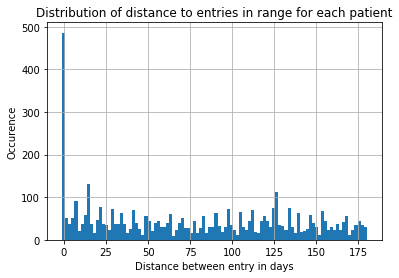

In [106]:
#title = 
l_distance = l_distance.drop_duplicates(subset=['PATNR', 'DIFF'])
ax = pd.to_numeric(l_distance['DIFF']).hist(bins=100)
ax.set_title("Distribution of distance to entries in range for each patient")
ax.set_xlabel("Distance between entries in days")
ax.set_ylabel("Occurence")

Text(0, 0.5, 'Occurence')

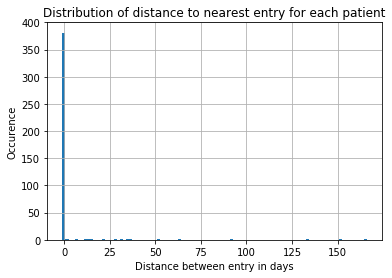

In [105]:
#title = 
l_distance2 = l_distance.sort_values(by='DIFF').drop_duplicates(subset=['PATNR'])
ax = pd.to_numeric(l_distance2['DIFF']).hist(bins=100)
ax.set_title("Distribution of distance to nearest entry for each patient")
ax.set_xlabel("Distance between entries in days")
ax.set_ylabel("Occurence")

In [ ]:
df_mergeJ[~(df_mergeJ['DAS 44_Metingen'].isna())].head()[['DAS 44_Metingen', 'DAS 28_Metingen', 'PATNR', 'XANTWOORD', 'DATUM', 'DATUM_DAS']]

In [ ]:
#df_merge[~(df_merge['actie'].isna())][['Conclusie', 'actie', 'drug2']].head(200)
#df_joints = pd.read_csv(r'output_files/DF_gewrichtspop.csv', sep='|', index_col=0)
#df_joints.head()
#df_joints[df_joints['STELLING']=='DAS 44(3)']['XANTWOORD']
#print(len(cleansed_df_cand['PATNR'].unique()))
#print(len(cleansed_df_cand[cleansed_df_cand['PATNR'].isin(df_joints['PATNR'].unique())]['PATNR'].unique()))
#print(len(cleansed_df_cand.merge(df_joints, on=['PATNR'], how='left')))
#cleansed_df_cand.merge(df_joints, on=['PATNR'], how='left')

In [ ]:
print(len(df_cleansed))

In [101]:
#cleansed_df_cand.columns = [str(col) + '2' for col in cleansed_df_cand.columns]
#cleansed_df_cand['DATUM']
# Filter on overlapping entries niet in overlappend -> want anders mergen!!
cleansed_df_cand = cleansed_df_cand.loc[~(cleansed_df_cand["index"].isin(rows_overlap[x][0] for x in range(len(rows_overlap))) & 
                               cleansed_df_cand["Conclusie"].isin(rows_overlap[x][1] for x in range(len(rows_overlap))))]
df_merge['DATUM'] = pd.to_datetime(df_merge['DATUM'], format="%Y-%m-%d")
cleansed_df_cand['DATUM'] = pd.to_datetime(cleansed_df_cand['DATUM'], format="%Y-%m-%d")

#df_ult = pd.DataFrame(index = col_list)
df_ult = pd.concat([cleansed_df_cand, df_merge], ignore_index=True)
#df_ult['DATUM2'] = pd.to_datetime(df_ult['DATUM2'], format="%Y-%m-%d")
#df_merge['DATUM']
df_ult.head()

E:\modules\Anaconda\Program\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


,Bezdat0,Bezdat02,Change,Change2,Conclusie,Conclusie2,Confidence,Confidence2,Continue,Continue2,...,freq_unit,freq_unit2,index,index2,route,route2,strength_nr,strength_nr2,strength_unit,strength_unit2
0,2013-11-05 00:00:00+00:00,NaN,1,NaN,Stop prednison,NaN,0.15,NaN,0,NaN,...,,NaN,CS00000503,NaN,None,NaN,,NaN,,NaN
1,2012-01-24 00:00:00+00:00,NaN,1,NaN,Start medicatie,NaN,0.15,NaN,0,NaN,...,,NaN,CS00000503,NaN,None,NaN,,NaN,,NaN
2,2012-01-24 00:00:00+00:00,NaN,1,NaN,Start medicatie,NaN,0.15,NaN,0,NaN,...,,NaN,CS00000503,NaN,None,NaN,,NaN,,NaN
3,2012-01-24 00:00:00+00:00,NaN,None,NaN,geen medicatie,NaN,NaN,NaN,None,NaN,...,,NaN,CS00000503,NaN,None,NaN,,NaN,,NaN
4,2011-07-04 00:00:00+00:00,NaN,True,NaN,geen voorschrift,NaN,0.15,NaN,False,NaN,...,,NaN,CS00000503,NaN,None,NaN,,NaN,,NaN


## REMOVE PRED & DEPO?

In [102]:
#df_ult.sort_values(by=['PATNR', 'DATUM'])[['index', 'PATNR', 'drug', 'DATUM' ,'actie']].head()
#df_ult = df_ult[~((~df_ult['actie'].isna()) & (df_ult['drug']).isna())] # dit evt. weghalen
#print(len(df_ult['PATNR'].unique()))
df_ult = df_ult[~(df_ult['drug'].isin(['prednison', 'depomedrol', 'prednisolon']))]
print(len(df_ult['PATNR'].unique()))

33


In [ ]:
df_ult.sort_values(by=['PATNR', 'DATUM'])[['index', 'PATNR', 'drug', 'DATUM' ,'actie','XANTWOORD', 'drug2', 'actie2']].to_csv(r'featureExtraction/DF_MERGED_LONG.csv', sep='|', index=True)

In [144]:
#df = pd.DataFrame(columns=['PATNR', 'drug','DATUM', 'actie', 'trigger'])

def appendToDF(row, actie, drug, trigger=''):
    """
    Creates a dictionary consisting of all the values per column for 
    the provided row.
    
    """
    d = {'PATNR' : row['PATNR'], 'drug': drug,'DATUM': row['DATUM'], 'actie': actie, 'trigger' : trigger,
        'index' : row['index'], 'XANTWOORD' : row['XANTWOORD'], 'freq_nr' : row['freq_nr'], 
        'freq_unit' : row['freq_unit'], 'strength_nr': row['strength_nr'], 
        'strength_unit' : row['strength_unit'], 'route': row['route'], 'duur' : row['duur'],
        'dosering': row['dosering'], 'form': row['form'], 'Continue': row['Continue'], 
        'Hypothetical': row['Hypothetical'], 'Change': row['Change'], 'Negation': row['Negation'],
        'Confidence': row['Confidence'], 'Conclusie': row['Conclusie'], 'Bezdat0': row['Bezdat0'],
        'index2' : row['index2'], 'DATUM2' : row['DATUM2'], 'PATNR2' : row['PATNR2'], 
        'XANTWOORD2' : row['XANTWOORD2'], 'drug2' : row['drug2'], 'strength_nr2': row['strength_nr2'], 
        'strength_unit2' : row['strength_unit2'], 'freq_nr2' : row['freq_nr2'], 
        'freq_unit2' : row['freq_unit2'], 'route2': row['route2'], 'duur2' : row['duur2'], 
        'dosering2': row['dosering2'], 'form2': row['form2'], 'actie2': row['actie2'], 
        'Continue2': row['Continue2'], 'Hypothetical2': row['Hypothetical2'], 
        'Change2': row['Change2'], 'Negation2': row['Negation2'], 'Confidence2': row['Confidence2'], 
        'Conclusie2': row['Conclusie2'], 'Bezdat02': row['Bezdat02'], 'dosering2': row['dosering2']}
    return d

def concentrationUpdate(strength_nr, strength_unit, prev_nr='', prev_unit=''):
    """
    Updates the concentration only if the newly provided
    number is valid.
    """
    if strength_nr != 'None' and strength_unit != 'None':
        return [strength_nr, strength_unit]
    elif strength_nr != 'None':
        return [strength_nr, prev_unit]
    elif strength_unit != 'None':
        return [prev_nr, strength_unit]
    else:
        return [prev_nr, prev_unit]
    
def switchOperation(d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr):
    """
    Update the current treatment status because of switch. If a switch
    happens while dmards are prescribed -> then the stop of the dmard
    is assumed (1). If there are no dmards currently prescribed than 
    the switch implies that all of drugs should be stopped
    """
    dmard_stop = 0
    if len([x for x in DMARD if x in d_cur_drugs.keys()]) != 0:
        dmard_stop = 1
    for drug in d_cur_drugs:
        l_val = d_trajectories[d_cur_drugs[drug]]
        if drug != row['drug'] and drug != '' and (drug in DMARD or dmard_stop == 0):
            df_drug = df[df['drug']==drug]
            max_date = df_drug[df_drug['DATUM']<=row['DATUM']]['DATUM'].max()
            drug_info = df_drug[df_drug['DATUM']==max_date].iloc[0]
            drug_info['DATUM'] = row['DATUM']
            drug_info['Conclusie'] = 'Stop want ' + row['Conclusie']
            d_trajectories[d_cur_drugs[drug]] = [drug_info['PATNR'], drug, l_val[2], row['DATUM'], drug_info['Bezdat0']]
            new_df = new_df.append(appendToDF(drug_info, 'Stop', drug, 'C: Drug stopped because of switch'), ignore_index=True)
    if dmard_stop == 1:
        [d_cur_drugs.pop(x) for x in DMARD if x in d_cur_drugs.keys()]
        [d_cur_conc.pop(x) for x in DMARD if x in d_cur_conc.keys()]
    else :
        d_cur_drugs = {}
        d_cur_conc = {}
    if row['drug'] not in d_cur_drugs.keys():
        d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
        d_cur_drugs[row['drug']] = key
    d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit']) # only if start
    new_df = new_df.append(appendToDF(row, 'Verandering', row['drug'], ''), ignore_index=True)
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df

def assumeContinuation(d_trajectories, d_cur_drugs, d_cur_conc, new_df, row, key, str_nr):
    """
    If there are no drugs found in the report -> assume continuation of all
    previously prescribed drugs (those that weren't stopped in the mean time)  
    """
    if row['drug']==None :
        if len(d_cur_drugs.keys()) > 0:
            print('Unnamed Med named!!')
            for k in d_cur_drugs.keys():
                l_val = d_trajectories[d_cur_drugs[k]]
                d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
                new_df = new_df.append(appendToDF(row, 'Continue', k, ''), ignore_index=True)
                row['drug'] = k
        else :
            row['drug'] = ''; 
            row['conclusie'] = 'geen medicatie'
    else :
        if len(d_cur_drugs.keys()) > 0:
            for k in d_cur_drugs.keys():
                l_val = d_trajectories[d_cur_drugs[k]]
                d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df, row

def assesActionStartOrChange(d_trajectories, d_cur_drugs, d_cur_conc, 
                             new_df, row, key, str_nr):
    """
    This function tries to translate the ambigious action to the 
    either a start or a change. These ambigious actions 
    originates from the medicator data in which increase, decrease &
    continue is not specified.
    """
    conclusion= 'Start'
    trig = ''
    if row['drug'] in d_cur_conc.keys():
        prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
        if str_nr != 'None' and prev_nr != '' and ' ' not in prev_nr:
            if float(str_nr) > float(prev_nr):
                conclusion = 'Verhoging'
                trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
            elif float(str_nr) < float(prev_nr):
                conclusion = 'Verlaging'
                trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
    d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
    d_cur_drugs[row['drug']] = key
    d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'])
    new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df

def assesActionContinueOrChange(d_trajectories, d_cur_drugs, d_cur_conc, 
                             df, new_df, row, key, str_nr):
    """
    This function tries to translate the ambigious action to the 
    either a continue or a change. These ambigious actions 
    originates from the medicator data in which increase, decrease &
    continue is not specified.
    """
    l_val = d_trajectories[d_cur_drugs[row['drug']]]
    d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
    prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
    if str_nr != 'None' and prev_nr != '' and str_nr != '' and prev_nr != None and ' ' not in prev_nr:
        if float(str_nr) > float(prev_nr):
            conclusion = 'Verhoging'
            trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
        elif float(str_nr) < float(prev_nr):
            conclusion = 'Verlaging'
        elif row['Change']:
            conclusion = 'Verandering'
            print(key)
            d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                    d_trajectories, d_cur_drugs, d_cur_conc, 
                    df, new_df, row, key, str_nr)
            return d_trajectories, d_cur_drugs, d_cur_conc, new_df    
        else:
            conclusion = 'Continue'
    else : 
        conclusion = 'Continue'
    new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
    
    d_cur_conc[row['drug']] = concentrationUpdate(row['strength_nr'], row['strength_unit'], 
                                        d_cur_conc[row['drug']][0], d_cur_conc[row['drug']][1])
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df

def assesConcentrationChange(d_trajectories, d_cur_drugs, d_cur_conc, new_df, 
                            row, key, str_nr):
    """
    This function is utilized if the drug is known but the 
    operation is unknown. The operation is assessed by 
    comparing the current concentration with the previous concentration:
        
    If the concentration increases then conclusion='Verhoging' (1)
    If the concentration decreases then conclusion='Verlaging' (2)
    If the concentration stays the same then conclusion='Continue' (3)
    """
    l_val = d_trajectories[d_cur_drugs[row['drug']]]
    d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], 
                                                l_val[2], row['DATUM'], row['Bezdat0']]
    prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
    if str_nr != 'None' and str_nr != '' and prev_nr != '' and \
        prev_nr != None and ' ' not in prev_nr:
        print(prev_nr, str_nr)
        if float(str_nr) > float(prev_nr):
            conclusion = 'Verhoging'
            trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
        elif float(str_nr) < float(prev_nr):
            conclusion = 'Verlaging'
        else:
            conclusion = 'Continue'
    else : 
        conclusion = 'Continue'
    new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
    d_cur_conc[row['drug']] = concentrationUpdate(row['strength_nr'], row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df, conclusion

def getStrengthNr(row):
    """
    Replaces the potential comma for a dot in strength numbers,
    otherwise these numbers cant be interpreted as integers.
    """
    str_nr = str(row['strength_nr']).replace(',','.')
    if ' ' in str_nr:
        str_nr = str_nr.split(" ")[0]
    prev_nr = str(row['strength_nr']).replace(',','.')
    if ' ' in prev_nr:
        prev_nr = prev_nr.split(" ")[0]
    return str_nr, prev_nr

def drugNotFoundBefore(d_trajectories, d_cur_drugs, d_cur_conc, 
                             df, new_df, row, key, str_nr):
    """
    If the drug hasnt been found in the previous entries of said patient
    then this function is called.
    
    Triggers occur in this function in the following situations:
        Stop -> if a drug is stopped: because it is impossible that a 
            drug that wasnt prescribed before can be stopped.
        Continue -> similarly to the aforementioned, it is also
            impossible for a drug to be continued if it there is 
            no initial start found.
    """
    l_change = ['Verhogen', 'Verlagen', 'Afbouwen', 'Ophogen']
    if (row['drug'] == 'med' or row['drug'] == 'medicatie') and row['actie'] != 'start':
        for k in d_cur_drugs.keys():
            l_val = d_trajectories[d_cur_drugs[k]]
            d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
            new_df = new_df.append(appendToDF(row, 'Continue', k, ''), ignore_index=True)
        print('Unspecified Med converted!!')
    elif row['actie'] == 'Stop':
        new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], 'CONFLICT-> Is al eerder geeindigd'), ignore_index=True)
    elif row['actie'] == 'Start' : # or row['actie'] == 'Start|Continue'
        d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
        d_cur_drugs[row['drug']] = key
        d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit']) # only if start
        new_df = new_df.append(appendToDF(row, 'Start', row['drug'], ''), ignore_index=True)
    elif row['actie'] == 'Switch':
        d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
    elif row['actie'] == 'Start|Continue':
        d_trajectories, d_cur_drugs, d_cur_conc, new_df = assesActionStartOrChange(
                d_trajectories, d_cur_drugs, d_cur_conc, new_df, row, key, str_nr)
    elif row['actie'] == 'Continue' or str(row['actie']) in l_change:
        d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
        d_cur_drugs[row['drug']] = key
        d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'])
        new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], 'CONFLICT->' + row['actie'] + ' voor start!'), ignore_index=True)   
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df, row

def drugFoundBefore(d_trajectories, d_cur_drugs, d_cur_conc, 
                             df, new_df, row, key, str_nr, prev_nr):
    """
    If the drug has been found in the previous entries of said patient
    then this function is called.
    
    Triggers occur in this function in the following situations:
        Start -> if a drug is started: The treatment has already started.
        This second start is converted to a continue
    """
    l_change = ['Verhogen', 'Verlagen', 'Afbouwen', 'Ophogen']
    if row['actie'] == 'Stop': # niet eerder gestopt!
        l_val = d_trajectories[d_cur_drugs[row['drug']]]
        d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
        del d_cur_drugs [row['drug']]
        del d_cur_conc [row['drug']]
        new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], ''), ignore_index=True)
    elif row['actie'] == 'Start': # al eerder gestart
        d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
        new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], 'CONFLICT-> Tweede start is gecorrigeerd met een Continue!'), ignore_index=True)
    elif row['actie'] == 'Continue':
        d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
        l_val = d_trajectories[d_cur_drugs[row['drug']]]
        d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
        new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], ''), ignore_index=True)
    elif row['actie'] == 'Start|Continue':
        d_trajectories, d_cur_drugs, d_cur_conc, new_df = assesActionContinueOrChange(
            d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
    elif row['actie'] == 'Verandering':
        d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
    elif str(row['actie']) in (l_change):
        l_val = d_trajectories[d_cur_drugs[row['drug']]]
        d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
        new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], 'CONFLICT-> Tweede start is gecorrigeerd met een Continue!'), ignore_index=True)
    elif row['actie'] == None and row['drug'] != None:
        d_trajectories, d_cur_drugs, d_cur_conc, new_df, conclusion = assesConcentrationChange(
            d_trajectories, d_cur_drugs, d_cur_conc, new_df, row, key, str_nr)
        print('Actie unknown: ', index, row['drug'], row['DATUM'], '\tConverted to -> ', conclusion)
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df, row

def medTrajectories(df, new_df):
    d_trajectories = {}
    d_cur_drugs = {}
    d_cur_conc = {}
    l_change = ['Verhogen', 'Verlagen', 'Afbouwen', 'Ophogen']
    for index, row in df.iterrows():
        if row['drug'] != None:
            key = row['drug'] + str(index)
        else : 
            key = 'Nonel'
        str_nr, prev_nr = getStrengthNr(row)
        d_trajectories, d_cur_drugs, d_cur_conc, new_df, row = assumeContinuation(
                                            d_trajectories, d_cur_drugs, d_cur_conc, 
                                            new_df, row, key, str_nr)
        if (any(str(row['drug']) in s for s in d_cur_drugs.keys()) == False):
            d_trajectories, d_cur_drugs, d_cur_conc, new_df, row = drugNotFoundBefore(d_trajectories, 
                                            d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
        else :
            d_trajectories, d_cur_drugs, d_cur_conc, new_df, row = drugFoundBefore(d_trajectories, 
                                            d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr, prev_nr)
        if None in d_cur_drugs:
            print('None', row['actie'])
    return new_df, d_trajectories

def formatTable(df, d_traject):
    for key, val in d_traject.items():
        df = df.append({'ID': key, 'PATNR' : val[0], 'drug' : val[1], 'BeginDat': val[2], 'EindDat': val[3], 'Bezdat0': val[4]}, ignore_index = True)
    return df
df_endTable = pd.DataFrame(columns=['index','ID', 'PATNR', 'drug', 'DATUM', 'strength_nr2'])
df_tableNetwork = pd.DataFrame(columns=['PATNR', 'drug', 'BeginDat', 'EindDat'])
for patnr in list(df_ult['PATNR'].unique()):
    
    df_pat = df_ult[df_ult['PATNR']==patnr].sort_values(by=['PATNR', 'DATUM']) 
    df_endTable, d_traject = medTrajectories(df_pat, df_endTable)
    df_tableNetwork = formatTable(df_tableNetwork, d_traject)
df_endTable.head()

Unspecified Med converted!!
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2012-03-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2012-03-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2012-03-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 hydroxychloroquine 2013-02-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2014-02-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2014-11-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 adalimumab 2011-12-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 adalimumab 2012-06-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 adalimumab 2012-06-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 ad

Actie unknown:  523 hydroxychloroquine 2017-01-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2017-02-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2017-03-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2017-05-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 tocilizumab 2017-05-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 tocilizumab 2017-09-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 tocilizumab 2017-10-05 00:00:00 	Converted to ->  Continue
Actie unknown:  523 sulfasalazine 2017-11-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2011-10-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2012-04-27 00:00:00 	Converted to ->  Co

Actie unknown:  523 sulfasalazine 2018-02-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2018-03-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 sulfasalazine 2018-03-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2016-08-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2017-09-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2016-02-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2017-02-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 methotrexaat 2013-11-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 leflunomide 2014-01-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  523 leflunomide 2014-03-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!

,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,freq_nr2,freq_unit,freq_unit2,index2,route,route2,strength_nr,strength_unit,strength_unit2,trigger
0,67160,NaN,9450112.0,methotrexaat,2012-02-22,10,2012-02-22 00:00:00,2012-01-24 00:00:00+00:00,0,1,...,,week,wk,CS00000503,None,None,10,milligram,mg,
1,CS00000503,NaN,9450112.0,methotrexaat,2012-02-23,NaN,2012-01-24 00:00:00+00:00,NaN,1,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
2,CS00000503,NaN,9450112.0,methotrexaat,2012-03-01,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
3,CS00000503,NaN,9450112.0,methotrexaat,2012-03-01,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
4,CS00000503,NaN,9450112.0,methotrexaat,2012-03-12,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,


### Update first visit date 
The first visit date needs to be updated because more information has been added to the dataset due to all the merges (Medicator & Meteor).

In [145]:
groups = df_endTable.groupby('PATNR')
firstDate = groups['Bezdat0'].min()
df_tableNetwork['Bezdat0'] = df_tableNetwork['PATNR'].map(firstDate)
df_endTable['Bezdat0']= df_endTable['PATNR'].map(firstDate)

In [146]:
df_tableNetwork.to_csv('test.csv', sep='|')

### Merge WITH DAS model DATA

In [107]:
#df_tableNetwork.to_csv(r'featureExtraction/DF_ExampleData_Network_CORRUPTED.csv', sep='|', index=True)
selection_das = ['ID_DAS', 'DATUM_DAS', 'BSE_Getal', 'DAS 28_Metingen', 'DAS 44_Metingen', 'PATNR', 'DATUM',
       'Gewrichten met prothese_Memo', 'Gezwollen gewrichten_Memo', 'Pijnlijke gewrichten_Memo',
       'Totaal gezwollen gewrichten_Getal',
       'Totaal pijnlijke gewrichten_Getal', 'VAS Patient (mm)_Getal',
       'Geen gezwollen gewrichten_Afvinkhokje', 'Geen pijnlijke gewrichten_Afvinkhokje',
       'DAS 28 links pijn_Getal', 'DAS 28 links zwelling_Getal',
       'DAS 28 rechts pijn_Getal', 'DAS 28 rechts zwelling_Getal',
       'DAS 28 totaal pijn_Getal', 'DAS 28 totaal zwelling_Getal',
       'DAS 44 links pijn_Getal', 'DAS 44 links zwelling_Getal',
       'DAS 44 rechts pijn_Getal', 'DAS 44 rechts zwelling_Getal',
       'DAS 44 totaal pijn_Getal', 'DAS 44 totaal zwelling_Getal',
       'DAS 44(3)_Metingen', 'DAS 28(3)_Metingen']
print(len(df_endTable))
df_endTable = df_endTable.merge(df_mergeJ[selection_das], on=['PATNR','DATUM'], how='left')
print(len(df_endTable))

1045
1222


### Assess the overall DAS at baseline and the final DAS (as well as the corresponding dates).

In [108]:
df_tableNetwork = df_tableNetwork[~(df_tableNetwork['drug']=='')] 
df_patDas1 = df_endTable.loc[df_endTable[~(df_endTable['DAS 44_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmin()][['PATNR', 'DAS 44_Metingen', 'DATUM']]
df_eindDas = df_endTable.loc[df_endTable[~(df_endTable['DAS 44_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmax()][['PATNR', 'DAS 44_Metingen', 'DATUM']]

df_patDas1['BeginDAS44'] = df_patDas1['DAS 44_Metingen'].str.replace(',','.')
df_patDas1['BeginDAS44_datum'] = df_patDas1['DATUM']
df_eindDas['EindDAS44'] = df_eindDas['DAS 44_Metingen'].str.replace(',','.')
df_eindDas['EindDAS44_datum'] = df_eindDas['DATUM']

df_patDas28 = df_endTable.loc[df_endTable[~(df_endTable['DAS 28_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmin()][['PATNR', 'DAS 28_Metingen', 'DATUM']]
df_eindDas28 = df_endTable.loc[df_endTable[~(df_endTable['DAS 28_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmax()][['PATNR', 'DAS 28_Metingen', 'DATUM']]
df_patDas28['BeginDAS28'] = df_patDas28['DAS 28_Metingen'].str.replace(',','.')
df_eindDas28['EindDAS28'] = df_eindDas28['DAS 28_Metingen'].str.replace(',','.')


df_endTable = df_endTable.merge(df_patDas1[['BeginDAS44', 'PATNR' , 'BeginDAS44_datum']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_eindDas[['EindDAS44', 'PATNR', 'EindDAS44_datum']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_patDas28[['BeginDAS28', 'PATNR']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_eindDas28[['EindDAS28', 'PATNR']], on=['PATNR'], how='left')

df_tableNetwork = df_tableNetwork.merge(df_patDas1[['BeginDAS44', 'PATNR' , 'BeginDAS44_datum']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_eindDas[['EindDAS44', 'PATNR', 'EindDAS44_datum']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_patDas28[['BeginDAS28', 'PATNR']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_eindDas28[['EindDAS28', 'PATNR']], on=['PATNR'], how='left')

df_endTable.head()


1222


,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,DAS 44 totaal pijn_Getal,DAS 44 totaal zwelling_Getal,DAS 44(3)_Metingen,DAS 28(3)_Metingen,BeginDAS44,BeginDAS44_datum,EindDAS44,EindDAS44_datum,BeginDAS28,EindDAS28
0,67160,NaN,9450112.0,methotrexaat,2012-02-22,10,2012-01-24 00:00:00+00:00,2012-01-24 00:00:00+00:00,0,1,...,NaN,NaN,NaN,NaN,4.6,2012-02-22,1.9,2014-02-19,3.3,2.6
1,67160,NaN,9450112.0,methotrexaat,2012-02-22,10,2012-01-24 00:00:00+00:00,2012-01-24 00:00:00+00:00,0,1,...,NaN,NaN,NaN,NaN,4.6,2012-02-22,1.9,2014-02-19,3.3,2.6
2,CS00000503,NaN,9450112.0,methotrexaat,2012-02-23,NaN,2012-01-24 00:00:00+00:00,NaN,1,NaN,...,NaN,NaN,NaN,NaN,4.6,2012-02-22,1.9,2014-02-19,3.3,2.6
3,CS00000503,NaN,9450112.0,methotrexaat,2012-03-01,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,NaN,NaN,NaN,NaN,4.6,2012-02-22,1.9,2014-02-19,3.3,2.6
4,CS00000503,NaN,9450112.0,methotrexaat,2012-03-01,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,NaN,NaN,NaN,NaN,4.6,2012-02-22,1.9,2014-02-19,3.3,2.6


### Assess first time remission date

In [109]:
df_endTable["DAS 44_Metingen"] =df_endTable["DAS 44_Metingen"].str.replace(",",".").astype(float)
df_endTable["DAS 28_Metingen"] =df_endTable["DAS 28_Metingen"].str.replace(",",".").astype(float)

df_tableNetwork['RemissieDat'] = ""
df_endTable['RemissieDat'] = ""
groups1 = df_endTable[df_endTable['DAS 44_Metingen']<=1.6].groupby('PATNR')
groups2 = df_endTable[df_endTable['DAS 28_Metingen']<=2.6].groupby('PATNR')
groups3 = df_endTable[df_endTable['Geen pijnlijke gewrichten_Afvinkhokje']=='Y'].groupby('PATNR') # == True
groups4 = df_endTable[df_endTable['Geen gezwollen gewrichten_Afvinkhokje']=='Y'].groupby('PATNR') # == Truue

cnt = 0
d_remission = {}
for pat in df_endTable['PATNR'].unique():
    l = []
    if pat in groups1['DATUM'].min().keys():
        l.append(groups1['DATUM'].min()[pat])
    if pat in groups2['DATUM'].min().keys():
        l.append(groups2['DATUM'].min()[pat])
    if pat in groups3['DATUM'].min().keys():
        l.append(groups3['DATUM'].min()[pat])
    if pat in groups4['DATUM'].min().keys():
        l.append(groups4['DATUM'].min()[pat])
    if len(l) > 0:
        d_remission[pat] = min(l)

d_remission
#df_tableNetwork.update(test_df)
for key, val in d_remission.items():
    df_tableNetwork.loc[df_tableNetwork['PATNR'] == key, 'RemissieDat'] = pd.to_datetime(val)
    df_endTable.loc[df_endTable['PATNR'] == key, 'RemissieDat'] = pd.to_datetime(val)
#df_tableNetwork
#df_tableNetwork.loc[list(d_remission.keys()), 'RemissieDat'] = list(d_remission.values())
### HIER DAS REMISSION
#df_endTable['RemissieDatum'] = df_endTable['PATNR'].map(d_remission) # dit werkt nog niet helemall
#df_endTable

In [110]:
#df_tableTest = df_tableNetwork.copy()
df_tableTest = pd.DataFrame(columns=['PATNR', 'drug', 'BeginDat', 'EindDat'])
tolerance = 30
for ix, row in df_tableNetwork.iterrows():
    df = df_endTable[df_endTable['PATNR']==row['PATNR']]
    if len(df[~(df['DAS 44_Metingen'].isna())]) != 0:
        df = df[~(df['DAS 44_Metingen'].isna())]
    #print(len(df))
    
    #df[df['BeginDAS44']]
    #df_drug = df[df['drug']==row['drug']]
    #print(row['drug'], row['BeginDat'])
    if row['BeginDat'] != None:
        if len(df[(df['DATUM']<=row['BeginDat']+timedelta(days=1)) & 
                  (df['DATUM']>=row['BeginDat']-timedelta(days=tolerance))]['DATUM']) > 0:
            max_date = df[(df['DATUM']<=row['BeginDat']+timedelta(days=1)) & 
                  (df['DATUM']>=row['BeginDat']-timedelta(days=tolerance))]['DATUM'].max()
            das_info = df[df['DATUM']==max_date].iloc[0]
        else : 
            das_info = {'DAS 44_Metingen' : np.nan} 
            max_date = np.nan
            
    d_val = row
    d_val['BeginDAS44_datum'] = max_date
    d_val['BeginDAS44'] = das_info['DAS 44_Metingen']
    #print(row['BeginDAS44_datum'], das_info['DAS 44_Metingen'])
    df_tableTest = df_tableTest.append(d_val, ignore_index=True)
    #df_tableTest['BeginDAS44'] = 
df_tableTest.head()


,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat
0,9450112.0,methotrexaat,2012-02-22,2012-03-30 00:00:00,3.3,4.6,2012-02-23 00:00:00,2012-01-24 00:00:00+00:00,2.6,1.9,2014-02-19,methotrexaat497,2014-02-19 00:00:00
1,9450112.0,sulfasalazine,2012-04-20,2012-08-01 00:00:00,3.3,4.6,2012-04-20 00:00:00,2012-01-24 00:00:00+00:00,2.6,1.9,2014-02-19,sulfasalazine366,2014-02-19 00:00:00
2,9450112.0,leflunomide,2012-07-04,2012-07-19 00:00:00,3.3,2.8,2012-07-04 00:00:00,2012-01-24 00:00:00+00:00,2.6,1.9,2014-02-19,leflunomide599,2014-02-19 00:00:00
3,9450112.0,hydroxychloroquine,2012-11-07,2014-11-05 00:00:00,3.3,2.9,2012-11-07 00:00:00,2012-01-24 00:00:00+00:00,2.6,1.9,2014-02-19,hydroxychloroquine515,2014-02-19 00:00:00
4,9450112.0,sulfasalazine,2013-02-20,2014-11-05 00:00:00,3.3,2.2,2013-02-20 00:00:00,2012-01-24 00:00:00+00:00,2.6,1.9,2014-02-19,sulfasalazine498,2014-02-19 00:00:00


In [111]:
#df_tableTest[["BeginDat", "EindDat", ]] = df_tableTest[["BeginDat", "EindDat", "Bezdat0", "EindDAS44_datum"]]
#pd.to_datetime(df_tableTest["BeginDat"], format='%d-%m-%Y')
df_tableTest["BeginDat"] = df_tableTest["BeginDat"].dt.strftime('%d-%m-%Y')
df_tableTest["EindDat"] = df_tableTest["EindDat"].dt.strftime('%d-%m-%Y')
df_tableTest["Bezdat0"] = pd.to_datetime(df_tableTest["Bezdat0"])
df_tableTest["Bezdat0"] = df_tableTest["Bezdat0"].dt.strftime('%d-%m-%Y')
df_tableTest["RemissieDat"] = pd.to_datetime(df_tableTest["RemissieDat"])
df_tableTest["RemissieDat"] = df_tableTest["RemissieDat"].dt.strftime('%d-%m-%Y')
df_tableTest["BeginDAS44_datum"] = df_tableTest["BeginDAS44_datum"].dt.strftime('%d-%m-%Y')

### Merge with METEOR

In [112]:
df_MET_new = pd.read_csv(r'featureExtraction/METEOR_subselectionFreeText2.csv', sep='|', index_col=0) # hier zitten nog geen corticos in
df_match = df_MET_new[df_MET_new['patientId'].isin(list(df_endTable['PATNR'].unique()))][['patientId','sex', 'yearOfBirth', 'smoking', 'RFC', 'aCCP']] #.to_csv(r'output_files/DF_LONG_candidates_MET.csv', sep='|', index=True)
df_match = df_match.rename(index=str, columns={"patientId": "PATNR"}) # , 'visitDate' : 'DATUM'



E:\modules\Anaconda\Program\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,48,49,50,59,60,61,114,115,116,125,126,127,136,137,138,147,148,149,158,159,160,169,170,171,180,181,182,212,259,268,269,270,279,280,281,290,291,292,301,302,303,451,452,453,514,515,516,523,524,525,595,596,597,604,605,606,613,614,615,658,659,660,667,668,669,676,677,678,685,686,687,703,704,705,712,713,714,730,731,732,739,740,741,757,758,759,766,767,768,775,776,777,784,785,786,793,794,795,802,803,804,829,830,831,838,839,840,847,848,849,865,866,867,874,875,876,892,893,894,901,902,903,927,928,929,930,937,938,939,973,974,975,982,983,984,991,992,993,1027,1028,1029,1036,1037,1038,1054,1055,1056,1063,1064,1065,1072,1073,1074,1081,1082,1083,1126,1127,1128,1134,1135,1136,1137,1144,1145,1146,1161,1180,1181,1182,1189,1190,1191,1198,1199,1200,1252,1253,1254,1261,1262,1263,1315,1316,1317,1324,1325,1326,1351,1352,1353,1360,1361,1362,1369,1370,1371,1378,1379,1380,1387,1388,1389,1396,1397,1398,

In [113]:
#df_tableNetwork.head()

print(len(df_endTable))
df_endTable = df_endTable.merge(df_match, on=['PATNR'], how='left')
df_endTable = df_endTable.drop_duplicates(subset=['PATNR', 'DATUM', 'drug'])
#df_tableNetwork.to_csv(r'featureExtraction/DF_ExampleData_Network.csv', sep='|', index=True)
print(len(df_endTable))
df_endTable.head()


1222
755


,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,EindDAS44,EindDAS44_datum,BeginDAS28,EindDAS28,RemissieDat,sex,yearOfBirth,smoking,RFC,aCCP
0,67160,NaN,9450112.0,methotrexaat,2012-02-22,10,2012-01-24 00:00:00+00:00,2012-01-24 00:00:00+00:00,0,1,...,1.9,2014-02-19,3.3,2.6,2014-02-19 00:00:00,1.0,1940.0,NaN,1.0,0.0
18,CS00000503,NaN,9450112.0,methotrexaat,2012-02-23,NaN,2012-01-24 00:00:00+00:00,NaN,1,NaN,...,1.9,2014-02-19,3.3,2.6,2014-02-19 00:00:00,1.0,1940.0,NaN,1.0,0.0
27,CS00000503,NaN,9450112.0,methotrexaat,2012-03-01,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,1.9,2014-02-19,3.3,2.6,2014-02-19 00:00:00,1.0,1940.0,NaN,1.0,0.0
45,CS00000503,NaN,9450112.0,methotrexaat,2012-03-12,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,1.9,2014-02-19,3.3,2.6,2014-02-19 00:00:00,1.0,1940.0,NaN,1.0,0.0
63,CS00000503,NaN,9450112.0,methotrexaat,2012-03-27,NaN,2012-01-24 00:00:00+00:00,NaN,None,NaN,...,1.9,2014-02-19,3.3,2.6,2014-02-19 00:00:00,1.0,1940.0,NaN,1.0,0.0


## Write Network file

In [114]:
df_tableTest.head()

,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat
0,9450112.0,methotrexaat,22-02-2012,30-03-2012,3.3,4.6,23-02-2012,24-01-2012,2.6,1.9,2014-02-19,methotrexaat497,19-02-2014
1,9450112.0,sulfasalazine,20-04-2012,01-08-2012,3.3,4.6,20-04-2012,24-01-2012,2.6,1.9,2014-02-19,sulfasalazine366,19-02-2014
2,9450112.0,leflunomide,04-07-2012,19-07-2012,3.3,2.8,04-07-2012,24-01-2012,2.6,1.9,2014-02-19,leflunomide599,19-02-2014
3,9450112.0,hydroxychloroquine,07-11-2012,05-11-2014,3.3,2.9,07-11-2012,24-01-2012,2.6,1.9,2014-02-19,hydroxychloroquine515,19-02-2014
4,9450112.0,sulfasalazine,20-02-2013,05-11-2014,3.3,2.2,20-02-2013,24-01-2012,2.6,1.9,2014-02-19,sulfasalazine498,19-02-2014


In [115]:
#df_tableNetwork.head()
df_tableTest= df_tableTest.merge(df_match, on=['PATNR'], how='left') # outer
df_tableTest = df_tableTest.drop_duplicates(subset=['PATNR', 'ID'])
df_tableTest[['PATNR', 'drug', 'BeginDat', 'EindDat', 'BeginDAS44', 'BeginDAS44_datum', 'Bezdat0', 'ID', 'RFC', 'RemissieDat', 'aCCP', 'sex', 'smoking', 'yearOfBirth']].to_csv(r'featureExtraction/DF_NetworkCortico'+ str(pd.datetime.now().strftime("%d%m%Y")) + '.csv', sep='|', index=True)
df_tableTest.head()
# print(len(df_tableNetwork['PATNR'].unique()))

,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat,sex,yearOfBirth,smoking,RFC,aCCP
0,9450112.0,methotrexaat,22-02-2012,30-03-2012,3.3,4.6,23-02-2012,24-01-2012,2.6,1.9,2014-02-19,methotrexaat497,19-02-2014,1.0,1940.0,NaN,1.0,0.0
9,9450112.0,sulfasalazine,20-04-2012,01-08-2012,3.3,4.6,20-04-2012,24-01-2012,2.6,1.9,2014-02-19,sulfasalazine366,19-02-2014,1.0,1940.0,NaN,1.0,0.0
18,9450112.0,leflunomide,04-07-2012,19-07-2012,3.3,2.8,04-07-2012,24-01-2012,2.6,1.9,2014-02-19,leflunomide599,19-02-2014,1.0,1940.0,NaN,1.0,0.0
27,9450112.0,hydroxychloroquine,07-11-2012,05-11-2014,3.3,2.9,07-11-2012,24-01-2012,2.6,1.9,2014-02-19,hydroxychloroquine515,19-02-2014,1.0,1940.0,NaN,1.0,0.0
36,9450112.0,sulfasalazine,20-02-2013,05-11-2014,3.3,2.2,20-02-2013,24-01-2012,2.6,1.9,2014-02-19,sulfasalazine498,19-02-2014,1.0,1940.0,NaN,1.0,0.0


In [116]:
df_endTable[['PATNR', 'drug', 'DATUM' ,'actie','Conclusie', 'strength_nr', 'strength_unit', 'Bezdat0', 'Bezdat02', 'Conclusie2', 'BSE_Getal', 'BeginDAS44', 'BeginDAS44_datum', 'EindDAS44', 'EindDAS44_datum', 'DAS 44_Metingen', 'DAS 28_Metingen', 'Geen gezwollen gewrichten_Afvinkhokje', 'Geen pijnlijke gewrichten_Afvinkhokje', 'RemissieDat','trigger']].to_csv(r'featureExtraction/DF_ENDTABLE_LONG' + str(pd.datetime.now().strftime("%d%m%Y")) + '_CORTICO.csv', sep='|', index=True)
df_endTable.to_csv(r'featureExtraction/DF_ENDTABLE_LONG_RAW' + str(pd.datetime.now().strftime("%d%m%Y")) + '_CORTICO.csv', sep='|', index=True)

In [226]:
#df_tableNetworkpd.to_datetime('2011-04-29')
print(len(df_endTable['PATNR'].unique()))

333


In [ ]:
df_endTable[~df_endTable['Geen pijnlijke gewrichten_Afvinkhokje'].isna()][['Geen pijnlijke gewrichten_Afvinkhokje', 'DATUM']]

### Merge With METEOR

In [ ]:
post_df.getDF().sort_values(by=['PATNR', 'DATUM'])[['PATNR', 'DATUM', 'drug', 'drug2', 'XANTWOORD', 'XANTWOORD2']]

In [ ]:
cleansed_df_cand.head()

In [ ]:
#new_df = new_df.set_index('index')
new_df['DATUM'] = pd.DatetimeIndex(pd.to_datetime(new_df['DATUM'])).tz_localize('UTC')
df_annotated_man['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_annotated_man['DATUM'])).tz_localize('UTC')
#df_auto = df_auto.set_index('index')
#df_auto_train.head()

In [ ]:
#df_auto = df_auto.set_index('index')
perf = [0, 0, 0, 0, 0]
thresh= 0.15
for index, row in (new_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(300)).iterrows():
    Y_entry = df_annotated_man[(df_annotated_man['PATNR']==row['PATNR']) & (df_annotated_man['DATUM']==row['DATUM'])]
    X_entry = new_df[(new_df['PATNR']==row['PATNR'])& (new_df['DATUM']==row['DATUM'])]
    auto_pool = []
    for ix, xx in X_entry.iterrows():
        if float(xx['Confidence']) >= thresh:
            auto_pool.append(xx['drug'])
            
            print(ix, auto_pool)
            print(Y_entry.index[0], X_entry['index'].values[0], auto_pool)
        else:
            print(xx['Confidence'], xx['drug'])
    if row['drug'] == None:
        row['drug']
    print(X_entry.loc[30])
    print(Y_entry)
    if X_entry.loc[index] == Y_entry:
        perf[0] += 1
    #elif X_entry.loc[index] == Y_entry[index]:
    
    #print(Y_entry['drug'].values)
    #print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    anno_pool = Y_entry['drug'].values
    #auto_pool = X_entry['drug'].values
    
    
    print(Y_entry['XANTWOORD'].values[0])
    print(index, auto_pool, anno_pool)
    if row['drug'] == None:
        print(len(Y_entry['drug'].values))
        print(len(Y_entry['drug'].values))
    print()
    
    print()
    #print(anno_pool)
    
    #Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]


In [ ]:
print(cleansed_df[cleansed_df['drug']==None])
#print(cleansed_df[cleansed_df['drug']==None])

In [ ]:

#print(df_train['PATNR'].unique)
#print(cleansed_df['PATNR'].unique)
print(row['DATUM'])
print(len(df_train[(df_train['DATUM']=='2017-01-24 00:00:00+00:00')]))
print(len(df_train[(df_train['DATUM']==row['DATUM'])]))

In [ ]:
correction_map = {"SAPS" : 'sulfasalazine', 'MTX' : "methotrexaat", 'enbrel': 'etanercept', 'azathioprin' : 'azathioprine'}



cleansed_df = new_df.copy()
#cleansed_df.apply(lambda x : geenMed(x))
#cleansed_df = cleansed_df[(cleansed_df['Confidence']>0.149) & (cleansed_df['Hypothetical']!=True)]
#cleansed_df = cleansed_df[~cleansed_df["XANTWOORD"].str.contains('improved -v', na=False)]
#cleansed_df.replace({"Unnamed: 6": correction_map}, inplace=True)
#print(df_train['DATUM'])
#cleansed_df = cleansed_df[~Y_entry["Unnamed: 6"].str.contains(row['target'], na=False)]
for index, row in (cleansed_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(100)).iterrows():
    Y_entry = df_annotated_man[(df_annotated_man['PATNR']==row['PATNR']) & (df_annotated_man['DATUM']==row['DATUM'])]
    #print(len(Y_entry))
    X_entry = cleansed_df[(cleansed_df['PATNR']==row['PATNR'])& (cleansed_df['DATUM']==row['DATUM'])]
    #print(len(X_entry))
    match = ''
    #for ix, val in X_entry.iterrows():
    #    match = Y_entry[Y_entry["Unnamed: 6"].str.contains(row['drug'], na=False)]
    #    if len(match) > 0:
    #        break
    #print('MATCH FOUND', len(match))
    #print('MATCHing', Y_entry['Unnamed: 6'])
    #print('MATCH FOUND: ', Y_entry["Unnamed: 6"], match['Unnamed: 6'], 'drug', row['drug'])
    #print(match)
    #for x in X_entry: 
    print(X_entry['index'].iloc[0])
    print('MAN: ', Y_entry['Unnamed: 6'])
    print('AUTO: ', X_entry[['Conclusie', 'Confidence', 'drug', 'Hypothetical']])
    print()

### Simple post processing

In [ ]:
df_MV = pd.read_csv(r'output_files/DF_MV.csv', index_col=0, sep="|", na_values=['NA'])
#df_MV = df_MV.replace(np.nan, '', regex=True)
#df_MV.head(1)
# df_MV['MedicatieGPKOmschrijving'] = df_MV['MedicatieGPKOmschrijving'].replace(np.nan, '', regex=True)

In [ ]:
df_MV.columns

In [ ]:
print(len(df_MV[df_MV['SchemaEindDatumtijd'].isna()])/len(df_MV['SchemaEindDatumtijd']))

In [ ]:
import random
print(len(df_MV['patient_id'].unique()))
print(len(df_auto['PATNR'].unique()))
print(len(np.intersect1d(df_MV['patient_id'].unique(), df_auto['PATNR'].unique())))

pat_pool = np.intersect1d(df_MV['patient_id'].unique(), df_auto['PATNR'].unique())
total_num = round(len(pat_pool)*0.5)
random.seed(777)
l_pat_random = random.sample(list(pat_pool), total_num)
#l_pat_random = pat_pool.sample(frac=0.5, random_state=777)
df_X = df_auto.loc[df_auto['PATNR'].isin(l_pat_random)]
df_Y = df_MV.loc[df_MV['patient_id'].isin(l_pat_random)]
#df_annotated = df_explore.sample(frac=0.5, replace=True, random_state=777)
df_Y['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(df_Y['SchemaStartDatumtijd'])).tz_localize('UTC')
df_X['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_X['DATUM'])).tz_localize('UTC')

df_X.to_csv(r'output_files/DF_X_EMR_sample.csv', sep='|', index=True)
df_X.to_csv(r'output_files/DF_Y_MV_sample.csv', sep='|', index=True)

In [ ]:
df_X = pd.read_csv(r'output_files/DF_X_EMR_sample.csv', index_col=0, sep="|", na_values=['NA'])
df_Y = pd.read_csv(r'output_files/DF_Y_MV_sample.csv', index_col=0, sep="|", na_values=['NA'])
df_Y['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(df_Y['SchemaStartDatumtijd'])).tz_localize('UTC')
df_X['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_X['DATUM'])).tz_localize('UTC')
df_X = df_X.replace(np.nan, '', regex=True)
df_Y = df_Y.replace(np.nan, '', regex=True)


In [ ]:

def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

df_Y_anno = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])

df_X_anno = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])
#df_corrected['XANTWOORD'].sample(frac=0.2, random_state=777).head(10).apply(lambda x: extractFeatures(str(x))).tolist()
#print(new_df)
# df_corrected

proc = em.Processing(df_X_anno)
for index, row in df_X.iterrows():
    pat_dos = df_Y[df_Y['patient_id']==row['PATNR']]
    #print(df_Y[df_Y['patient_id']==row['PATNR']]['SchemaStartDatumtijd'])
    #print(df_Y[df_Y['SchemaStartDatumtijd']==row['DATUM']])
    near_dat = nearest(pat_dos['SchemaStartDatumtijd'],row['DATUM'])
    Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]
    #proc_row= proc.handleStickyChars(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieGPKOmschrijving'].lower())
    l_entryX = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']
    #print(Y_entry.index)
    Y_entry_txt = proc.handleStickyChars(Y_entry['SchemaOmschrijving'].tolist()[0].lower()+ ' ' + Y_entry['MedicatieGPKOmschrijving'].tolist()[0].lower())
    l_entryY = extractFeatures(Y_entry_txt)

    #print(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieProductNaam'].lower())
    #print(index)
    for entry in l_entryX: 
        df_X_anno = df_X_anno.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15]}, ignore_index=True)
    for entry in l_entryY: 
        df_Y_anno = df_Y_anno.append({'ID' : Y_entry['VoorschriftID'].tolist()[0], 'DATUM' : near_dat, 'index':int(Y_entry.index[0]), 'PATNR' : Y_entry['patient_id'].tolist()[0], 'XANTWOORD' : Y_entry_txt, 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], '_closestDATUM' : row['DATUM']}, ignore_index=True)
    
#new_df = new_df.replace('None{2}', np.nan, regex=True)
#new_df = new_df.replace('None{1}', '', regex=True)



df_Y_anno = df_Y_anno.set_index('index')
df_Y_anno = df_Y_anno[df_Y_anno['drug']!=None]


### All unique Values in NEW_DF

In [ ]:
df_Y_anno = df_Y_anno[df_Y_anno['drug']!='prednison']
df_Y_anno = df_Y_anno[df_Y_anno['drug']!='depomedrol']
df_Y_anno = df_Y_anno.replace(np.nan, '', regex=True)

df_X_anno = df_X_anno[df_X_anno['drug']!='prednison']
df_X_anno = df_X_anno[df_X_anno['drug']!='depomedrol']

In [ ]:
df_X_anno = df_X_anno.set_index('index')
#df_X_anno[df_X_anno['drug']!=None]

In [ ]:
#df_Y_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)
df_X_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)

In [ ]:
perf = [0, 0, 0, 0]
thresh= 0.10
for index, row in (df_X_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)).iterrows():
    Y_entry = df_Y_anno[(df_Y_anno['PATNR']==row['PATNR']) & (df_Y_anno['_closestDATUM']==row['DATUM'])]
    #print(Y_entry['drug'].values)
    #print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    if row['Confidence']>=thresh and Y_entry['drug'].values[0] == row['drug']:
        print('\nTrue Positive: ')
        perf[0]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']>=thresh and Y_entry['drug'].values[0] != row['drug']:
        print('\nFalse Positive: ')
        perf[1]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']<thresh and Y_entry['drug'].values[0] == row['drug']:
        print('\nFalse Negative: ')
        perf[2]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']<thresh and Y_entry['drug'].values[0] != row['drug']:
        print('\nTrue Negative: ')
        perf[3]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    #Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]


In [ ]:
df_X_anno.loc[25721]['XANTWOORD'].values[0]
#mergedStuff = pd.merge(df_X_anno, df_Y_anno, on=['PATNR'], how='inner')
#mergedStuff.head()

In [ ]:
print(perf)
print(perf[0]/(perf[0]+perf[1])) # PPV (TP+FP)
print(perf[3]/(perf[3]+perf[1]), perf[3], perf[1]) # Specificity (TN+FP)
print(perf[0]/(perf[2]+perf[0])) # Sensitivity (TP+FN)

#### visualize - Exploratory

In [ ]:
df_X_anno['Confidence'].value_counts().plot(kind='bar', figsize=(9,9), title='Action numbers extracted from EMR')

In [ ]:
new_df['Confidence'].max()

In [ ]:
new_df['sterkte'].value_counts().plot(kind='bar', figsize=(9,9), title='Strength numbers extracted from EMR')

In [ ]:
df_test = df_annotated_man.copy()
df_test = df_test.drop(sub_selection) 
#df_test = df_annotated_man.ix[~sub_selection]
len(df_test)

### Post processing - Auto Annotation

In [ ]:
# ToDO -> MED VOORSCHRIFT -> START dat + evt. andere gegevens
# LOCF
# None -> aanvullen -> indien je weet dat er sprake is van een continue? -> default aanvullen? -> toekomst kijken
#gazeIntoFuture()
#gazeIntoPast()
new_df = new_df.reset_index() ### required for next step

###### Task,Duration,Start,Resource,Dependency
###### Task 1,5,12/31/2016,Joe,
###### Task 2,10,12/31/2016,Mark,Task 1

In [ ]:

locf_df = pd.DataFrame(columns=['ID', 'Med', 'Datum', 'Conf'])
values1 = [['MTX',34, 0.5], ['LEF', 41, 0.4], ['RTX', 31, 0.6]]
for x in range(len(values1)):
    locf_df = locf_df.append({'ID' : x, 'Med' : values1[x][0], 'Datum' : values1[x][1], 'Conf': values1[x][2]}, ignore_index=True)
mv_df = pd.DataFrame(columns=['ID', 'Med', 'Datum', 'Conf'])
values2 = [['RTX',30, 0.9], ['KD', 21, 0.7], ['LAX', 64, 0.6]]
for x in range(len(values2)):
    mv_df = mv_df.append({'ID' : x, 'Med' : values2[x][0], 'Datum' : values2[x][1], 'Conf': values2[x][2]}, ignore_index=True)

def leastDistance(d_candidates):
    for key, value in d_candidates.items():
        print(value[0])
    print(min(d_candidates, key=d_candidates.get[0]))
    return
        
    
    
best_candidates = {'LOCF': [locf_df['Datum'].min(), locf_df['Datum'].idxmin()], 'MV': [mv_df['Datum'].min(), mv_df['Datum'].idxmin()]}
leastDistance(best_candidates)

In [ ]:
new_dfEXP['PATNR'].head(5)

In [ ]:
df_gantt = {}      
df_gantt = pd.DataFrame(columns=['id', 'name', 'start', 'duration'])
pat_df = new_dfEXP[new_dfEXP['PATNR']==6727644]
pat_df = pat_df.sort_values(by='DATUM')
first_date = pat_df['DATUM'].iloc[0]
pat_df = pat_df.reset_index()

for index, row in pat_df.iterrows():
    df_gantt = df_gantt.append({'id' : index, 'name': row['drug'], 'start': row['DATUM'][:10], 'duration' : 200, 'confidence': row['Confidence']}, ignore_index=True)
df_gantt

In [ ]:
df_gantt.to_csv(r'gantt/DF_GANTT.csv', sep=',', index=False)

### Standardize data?

In [ ]:

route_map = {"i.v.": "intravenous", "iv": "intravenous", "i.v": "intravenous", "i.a." : "intraarticular", "ia" : "intraarticular", "i.a" : "intraarticular", \
             "sc" : "subcutaneous", "s.c." : "subcutaneous", "s.c" : "subcutaneous", "per os": "oraal", \
             "p.o." : "oraal", "p.o" : "oraal", "po" : "oraal", "i.m.": "intramuscular", "im": "intramuscular", "i.m": "intramuscular"}
freq_map = {"wkn": "weken", "wk": "wekelijks", "week": "wekelijks", "dag" : "dagelijks", "dg" : "dagelijks", "d" : "dagelijks", "dd" : "dagelijks", \
            "mnd" : "maand", "maanden": "maandelijks", "jr" : "jaar", "jaren" : "jaarlijks" }
duration_map = {"wkn": "weken", "mnd" : "maand", "jr" : "jaar"}
operation_map = {"verlaag" : "verlagen", "stop" : "stoppen", "gecontinueerd" : "continue", "doorgaan" : "continue",  
        "afbouw" : "afbouwen", "start" : "starten", "verhoogd" : "verhogen", "verlaagd" : "verlagen", \
        "verhoog" : "verhogen", "opgehoogd" : "ophogen", "verlaag" : "verlagen", \
        "vervolgen": "continue", "vervolgd": "continue", "door" : "continue", "continueren": "continue", 
                "gestopt" : "stoppen", "gestart": "starten", "stopt" : "stoppen"}

new_df.replace({"Route": route_map}, inplace=True)
new_df.replace({"Freq_unit": freq_map}, inplace=True)
new_df.replace({"Operation": operation_map}, inplace=True)
new_df.replace({"Duration_unit": duration_map}, inplace=True)
new_df = new_df.set_index('index')

new_df

In [ ]:
print(len(df_MV[df_MV['VoorschriftBron']!='HIX']))
print(len(df_MV[df_MV['VoorschriftBron']=='HIX']))

In [ ]:
df_annotated_man.align(other, join='outer', axis=None, level=None, copy=True, fill_value=None, method=None, limit=None, fill_axis=0, broadcast_axis=None)[source]¶

In [ ]:
# Overlap
df_REU = read_csv(r'output_files/DF_REU.csv')


#df_MV['MedicatieGPKOmschrijving']

In [ ]:
df_REU['PATNR'].unique()

In [ ]:
df_MV['patient_id'] = pd.to_numeric(df_MV['patient_id'])

In [ ]:

df_REU[df_REU['PATNR'].isin(df_MV['patient_id'].unique())]

In [ ]:
df_MV.columns

In [ ]:
#df_MV.columns
df_MV = df_MV.replace('', np.nan, regex=True)
df_MV[df_MV['VoorschriftBron']=='HIX'].count().plot(kind='bar', figsize=(12,12), title='Entries per Column')

## Evaluate Performance

In [ ]:
import io
def build_convenient_list(f_name, delim, encod):
    tot_list = []
    if encod == "ascii":
        f = io.open(f_name, mode='r')
    else :
        f = io.open(f_name, mode='r', encoding= encod)
    content = f.read()
    for x in content.split('[report_end]'):
        tot_list.append(x.split("|"))
    f.close()
    return tot_list

def list_to_df(conv_list):
    headers = conv_list.pop(0)
    df = pd.DataFrame(conv_list, columns=headers)
    return df


dcm_mv = build_convenient_list(r"output_files/dbo.proc_DCM_MV.txt", "|", "utf-16")
df_MV = list_to_df(dcm_mv)
dcm_mv = None


In [ ]:
df_MV.to_csv(r'output_files/DF_MV.csv', sep='|', index=True, encoding = "utf-8")

In [ ]:
df_Y.head(10)[['SchemaOmschrijving', 'MedicatieGPKOmschrijving']]

### Exploration set 

In [ ]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

new_dfEXP= pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])
#df_corrected['XANTWOORD'].sample(frac=0.2, random_state=777).head(10).apply(lambda x: extractFeatures(str(x))).tolist()
#print(new_df)
# df_corrected

proc = em.Processing(df_auto)
for index, row in df_auto.head(500).iterrows():
    l_entry = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']

    #print(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieProductNaam'].lower())
    #print(index)
    for entry in l_entry: 
        new_dfEXP = new_dfEXP.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15]}, ignore_index=True)
#new_df = new_df.replace('None{2}', np.nan, regex=True)
#new_df = new_df.replace('None{1}', '', regex=True)
new_dfEXP.head()

